### Importing libraries and files

In [ ]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.utils import shuffle

import scipy.cluster.hierarchy as sch
from scipy.spatial import distance
from scipy import stats as s

import statistics
from statistics import mode, mean

from google.colab import files

import random
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import math

## Loading data

In [ ]:
!gdown --id 1PZyFjsAWcSiD7EVQbUoaG7MEBw5a-eWw #TV50_352353_20.csv
!gdown --id 1MxvEHNGvFgc9z2mbH8_HHzi7z7ISMpfL #tvsum50.xlsx

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1PZyFjsAWcSiD7EVQbUoaG7MEBw5a-eWw
To: /content/TV50_352353_20.csv
100% 14.4M/14.4M [00:00<00:00, 78.2MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1MxvEHNGvFgc9z2mbH8_HHzi7z7ISMpfL
To: /content/tvsum50.xlsx
100% 24.8M/24.8M [00:00<00:00, 62.2MB/s]


In [ ]:
df=pd.read_csv('TV50_352353_20.csv', header=None)

### Normalizing data

In [ ]:
scaler = StandardScaler()
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d)
#scaled_df.head()
#print(scaled_df)

## Simple analysis

In [ ]:
video_number = [1,2,3] # enter the video(s) which you want to analyze
annotator_number = 0 #enter the annotator which you want to analyze

In [ ]:
counts = [] #gets the percentage of 1's,2's... that is given by a particular annotator for a given set of videos
count1, count2, count3, count4, count5 = 0,0,0,0,0
df = pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=44, header=None)
for i in range(df.shape[0]): #iterate over rows
    for j in range(df.shape[1]): #iterate over columns
        value = df.at[i, j] #get cell value
        if value == 1:
          count1 += 1
        elif value == 2:
          count2 += 1
        elif value == 3:
          count3 += 1
        elif value == 4:
          count4 += 1
        elif value == 5:
          count5 += 1
count = [count1,count2,count3,count4,count5]
counts.append([(x / sum(count))*100 for x in count])
print(counts)

[[48.421236059479554, 25.11733271375465, 14.024163568773234, 8.274860594795538, 4.162407063197026]]


In [ ]:
count

[3282282, 1845530, 1079413, 561263, 278572]

## K means

This can be run to find the appropriate number of clusters.
In this case, we proceed with k = 2

In [ ]:
sse = [] #calculates the silhouette coefficent and Sum of Squared Error for k from 2 to 10
slc=[]
for k in range(1,10):
  kmeans = KMeans(n_clusters=k, init= "random", max_iter=100000)
  kmeans.fit(df.T)
  sse.append(kmeans.inertia_)
  if k!=1:
    XXX, YYY = shuffle(df.T, kmeans.labels_)
    slc.append(silhouette_score(XXX, YYY))

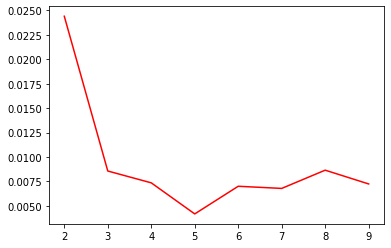

In [ ]:
plt.plot([i for i in range(2,10)],slc,'red') #plotting the silhouette coefficient

### K means with n = 2

In [ ]:
# running  K means on core annotators as given by DBSCAN
# running the clustering alogrithm 5 times to get 5 different clusters
group_1 = []  # the group 1 of clusters
group_2 = []  # the group 2 of clusters
temp_df = df.iloc[:,[0, 3, 4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]]
for i in range(5):
   kmeans = KMeans(n_clusters=2, algorithm = 'auto', copy_x=False)
   kmeans.fit(temp_df.T)
   group_1.append(temp_df.T[kmeans.labels_==0])
   group_2.append(temp_df.T[kmeans.labels_==1])
a = [list(group_1[k].index) for k in range(5)]
b = [list(group_2[k].index) for k in range(5)]
print("Group 1")
for xs in range(len(a)):
  print("Result for iteration",xs+1,"is: "," ".join(map(str, a[xs])))
print("\nGroup 2")
for xs in range(len(b)):
  print("Result for iteration",xs+1,"is: "," ".join(map(str, b[xs])))
print()

Group 1
Result for iteration 1 is:  0 4 10 11 14 16 17 18 19
Result for iteration 2 is:  0 4 10 11 14 16 17 18 19
Result for iteration 3 is:  0 3 4 7 10 12 14 15 16 17 18 19
Result for iteration 4 is:  3 5 12 13
Result for iteration 5 is:  3 5 7 11 13 15

Group 2
Result for iteration 1 is:  3 5 7 12 13 15
Result for iteration 2 is:  3 5 7 12 13 15
Result for iteration 3 is:  5 11 13
Result for iteration 4 is:  0 4 7 10 11 14 15 16 17 18 19
Result for iteration 5 is:  0 4 10 12 14 16 17 18 19



In [ ]:
# running the clustering alogrithm 5 times to get 5 different clusters
group_1 = []  # the group 1 of clusters
group_2 = []  # the group 2 of clusters
for i in range(5):
   kmeans = KMeans(n_clusters=2, algorithm = 'full')
   kmeans.fit(df.T)
   group_1.append(df.T[kmeans.labels_==0])
   group_2.append(df.T[kmeans.labels_==1])
a = [list(group_1[k].index) for k in range(5)]
b = [list(group_2[k].index) for k in range(5)]
print("Group 1")
for xs in range(len(a)):
  print("Result for iteration",xs+1,"is: "," ".join(map(str, a[xs])))
print("\nGroup 2")
for xs in range(len(b)):
  print("Result for iteration",xs+1,"is: "," ".join(map(str, b[xs])))
print()

In [ ]:
# trying the elkan algorithm of K means
# running the clustering alogrithm 5 times to get 5 different clusters
group_1 = []  # the group 1 of clusters
group_2 = []  # the group 2 of clusters
for i in range(5):
   kmeans = KMeans(n_clusters=2, algorithm = 'elkan')
   kmeans.fit(df.T)
   group_1.append(df.T[kmeans.labels_==0])
   group_2.append(df.T[kmeans.labels_==1])
a = [list(group_1[k].index) for k in range(5)]
b = [list(group_2[k].index) for k in range(5)]
print("Group 1")
for xs in range(len(a)):
  print("Result for iteration",xs+1,"is: "," ".join(map(str, a[xs])))
print("\nGroup 2")
for xs in range(len(b)):
  print("Result for iteration",xs+1,"is: "," ".join(map(str, b[xs])))
print()

### K means for every category

In [ ]:
for i in range(1,51,5):
  #compliling the data for videos in 1 category
  df1=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i+0, header=None)
  df2=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i+1, header=None)
  df3=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i+2, header=None)
  df4=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i+3, header=None)
  df5=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i+4, header=None)
  df_category = pd.concat([df1,df2,df3,df4,df5])
  df_category = df_category.iloc[:,0:20] #using only the first 20 columns
  group_1 = []  # the group 1 of clusters
  group_2 = []  # the group 2 of clusters
  for j in range(5): # running K means 5 times to check for consitency
    kmeans = KMeans(n_clusters=2, algorithm = 'auto')
    kmeans.fit(df_category.T)
    group_1.append(df.T[kmeans.labels_==0])
    group_2.append(df.T[kmeans.labels_==1])
  # displaying the results
  a = [list(group_1[k].index) for k in range(5)]
  b = [list(group_2[k].index) for k in range(5)]
  print("Group 1 for category",(i//5)+1)
  for xs in range(len(a)):
    print("Result for run",xs+1,"is: "," ".join(map(str, a[xs])))
  print("Group 2 for category",(i//5)+1)
  for xs in range(len(b)):
    print("Result for run",xs+1,"is: "," ".join(map(str, b[xs])))
  print()
  

## Hierchical clustering

{'color_list': ['b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b',
  'b'],
 'dcoord': [[0.0, 589.5276659682568, 589.5276659682568, 0.0],
  [0.0, 603.7729754199876, 603.7729754199876, 589.5276659682568],
  [0.0, 595.4389379949828, 595.4389379949828, 603.7729754199876],
  [0.0, 602.9418411157911, 602.9418411157911, 595.4389379949828],
  [602.9418411157911, 617.2014439531204, 617.2014439531204, 0.0],
  [617.2014439531204, 600.3382450667874, 600.3382450667874, 0.0],
  [0.0, 609.3241918335226, 609.3241918335226, 600.3382450667874],
  [0.0, 612.6686395632576, 612.6686395632576, 609.3241918335226],
  [612.6686395632576, 625.7504974251588, 625.7504974251588, 0.0],
  [0.0, 628.4351918776407, 628.4351918776407, 625.7504974251588],
  [0.0, 632.8626916151557, 632.8626916151557, 628.4351918776407],
  [632.8626916151557, 620.531623861929, 620.531623861929, 0.0],
  [0.0, 647.7144063554317, 647.7144063554317, 620.531623861929],
  [0.0, 639.1704490476834, 639.17044

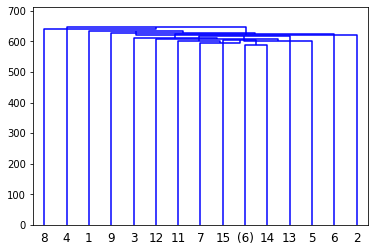

In [ ]:
dendrogram = sch.linkage(scaled_df.T, method  = "median",optimal_ordering = True) 
sch.dendrogram(dendrogram, p=15, truncate_mode='lastp')
#print(dendrogram) #displaying the results in this format to compare results with DBSCAN
# noise for all data [2, 3, 4, 8, 9]
# noise for segment data [1, 6, 2, 8, 9]

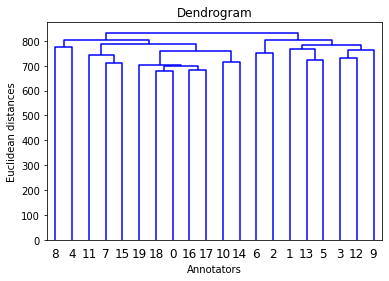

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(scaled_df.T,method  = "ward",optimal_ordering = True))
plt.title('Dendrogram')
plt.xlabel('Annotators')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
def plot_dendrogram_1(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

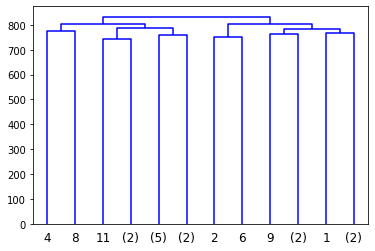

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(scaled_df.T)
plot_dendrogram_1(model, truncate_mode="level", p=3)
# noise for all data [2, 3, 4, 8, 9]
# noise for segment data [1, 6, 2, 8, 9]

In [ ]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

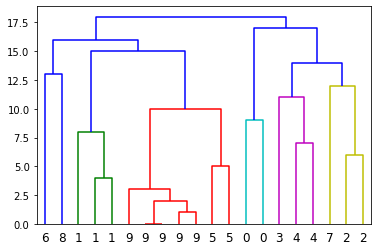

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering( n_clusters=10)
model = model.fit(scaled_df.T)
plot_dendrogram(model, labels=model.labels_)
plt.show()

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(scaled_df.T, method  = "single"))
plt.title('Dendrogram')
plt.xlabel('Annotators')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(scaled_df.T, method  = "complete"))
plt.title('Dendrogram')
plt.xlabel('Annotators')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(scaled_df.T, method  = "average"))
plt.title('Dendrogram')
plt.xlabel('Annotators')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(scaled_df.T, method  = "weighted"),count_sort=True)
plt.title('Dendrogram')
plt.xlabel('Annotators')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(scaled_df.T, method  = "centroid"))
plt.title('Dendrogram')
plt.xlabel('Annotators')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
dendrogram = sch.dendrogram(sch.linkage(scaled_df.T, method  = "median"))
plt.title('Dendrogram')
plt.xlabel('Annotators')
plt.ylabel('Euclidean distances')
plt.show()

## Annotation analysis

### Comparing Annotators

In [ ]:
#comparing 2 annotators by comparing the scores given by them for each frame
scores_4 = df[19].tolist() #get scores given by annotator 1
scores_8 = df[16].tolist() #get scores given by annotator 2
count_1 = 0
for i in range(len(scores_4)):
  if scores_4[i] == scores_8[i]:
    count_1 += 1
print(count_1)
count_1/len(scores_4)

152818


0.43370710622585873

As seen from the results - we can see that annotator 4 and 8 are usually in the same cluster, yet the scores given by them are different by 62%

In [ ]:
# to find the difference in scores given by any two annotators
a = []
for i in range(20):
  scores_i = df[i].tolist()
  b = []
  for j in range(20):
    scores_j = df[j].tolist()
    count = 0
    for k in range(len(scores_i)):
      if scores_i[k] != scores_j[k]:
        count += 1
    percent = round((count/len(scores_4)),2)
    b.append(percent)
  a.append(b)
print('\n'.join(['\t'.join([str(cell) for cell in row]) for row in a])) #printing in a nice format

0.0	0.61	0.61	0.65	0.62	0.64	0.6	0.61	0.63	0.62	0.6	0.61	0.6	0.58	0.61	0.59	0.58	0.59	0.57	0.58
0.61	0.0	0.63	0.66	0.64	0.65	0.65	0.64	0.65	0.64	0.64	0.63	0.65	0.63	0.65	0.63	0.65	0.64	0.64	0.63
0.61	0.63	0.0	0.68	0.65	0.63	0.63	0.64	0.65	0.65	0.64	0.65	0.63	0.65	0.63	0.62	0.62	0.64	0.62	0.62
0.65	0.66	0.68	0.0	0.67	0.65	0.65	0.64	0.66	0.63	0.62	0.64	0.62	0.63	0.64	0.64	0.63	0.63	0.63	0.65
0.62	0.64	0.65	0.67	0.0	0.64	0.63	0.64	0.63	0.65	0.62	0.62	0.63	0.65	0.63	0.63	0.61	0.63	0.63	0.63
0.64	0.65	0.63	0.65	0.64	0.0	0.63	0.63	0.65	0.63	0.61	0.62	0.63	0.63	0.63	0.62	0.6	0.61	0.61	0.63
0.6	0.65	0.63	0.65	0.63	0.63	0.0	0.63	0.64	0.62	0.62	0.63	0.62	0.64	0.63	0.6	0.59	0.62	0.6	0.61
0.61	0.64	0.64	0.64	0.64	0.63	0.63	0.0	0.65	0.64	0.6	0.6	0.63	0.62	0.63	0.58	0.62	0.62	0.62	0.62
0.63	0.65	0.65	0.66	0.63	0.65	0.64	0.65	0.0	0.64	0.64	0.64	0.63	0.65	0.63	0.63	0.62	0.62	0.63	0.62
0.62	0.64	0.65	0.63	0.65	0.63	0.62	0.64	0.64	0.0	0.61	0.63	0.61	0.63	0.61	0.62	0.61	0.58	0.6	0.61
0.6	0.64	0.64	0.62	0

In [ ]:
'''
as we can see, the difference between scores given by annotators is very different
just by comparing 2 annotators, we can see that there is a difference in scores ranging from 55% to 65%
This shows that there is very little correlation between any 2 annotators, and hence it is really difficult to cluster them into groups and get consistent results
'''

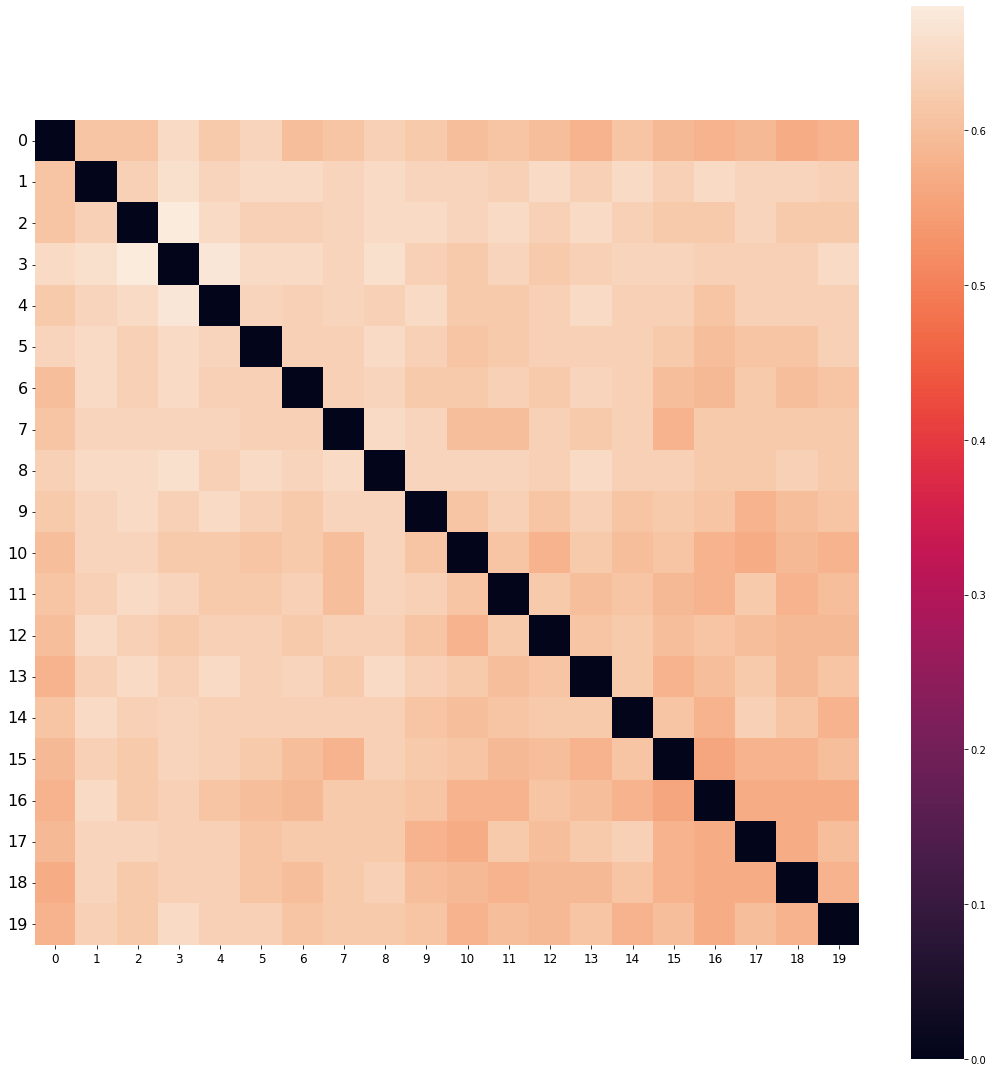

In [ ]:
#displaying the data as a heatmap
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(a, square=True, ax=ax)
plt.yticks(rotation=0,fontsize=16);
plt.xticks(fontsize=12);
plt.tight_layout()

### Analysing every category



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wa

1 | 162.5475332110247 | 143.15494525892962
2 | 94.03994082844487 | 83.7007623068207
3 | 142.93099145373475 | 125.32379676219398
4 | 145.93922226957542 | 127.96687676674327
5 | 123.08051095766868 | 109.28999742104115
6 | 143.31542277344556 | 125.99544205115768
7 | 133.77345950484272 | 117.65327175599214
8 | 106.6233996989364 | 94.9791233818311
9 | 136.4788507168111 | 120.72338137072407
10 | 102.19514671386727 | 89.887497634071


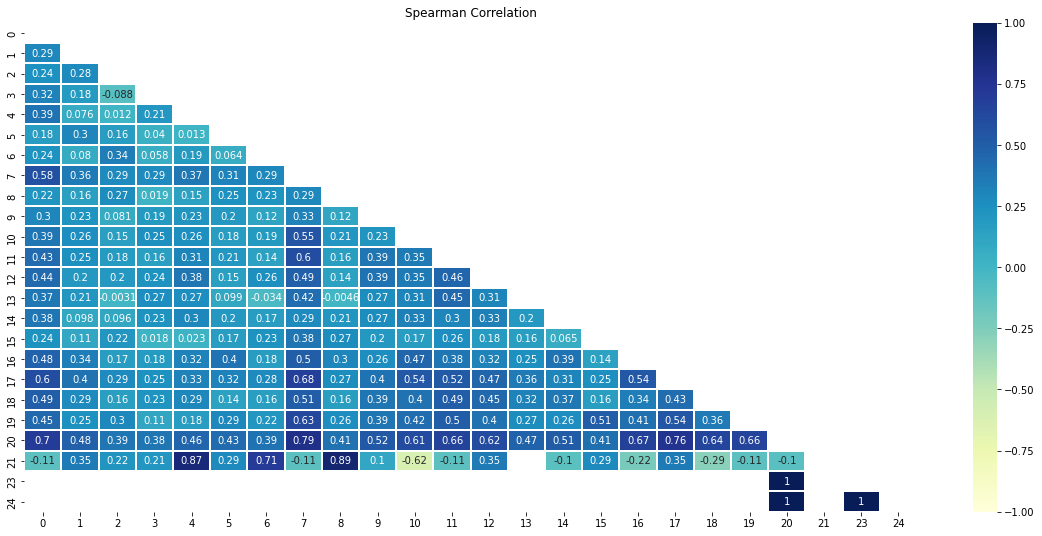

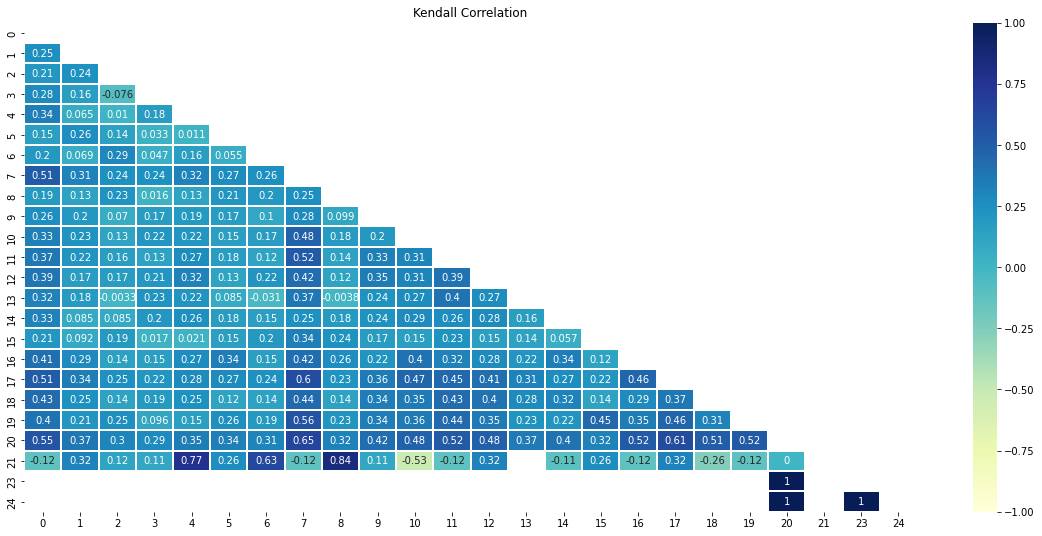

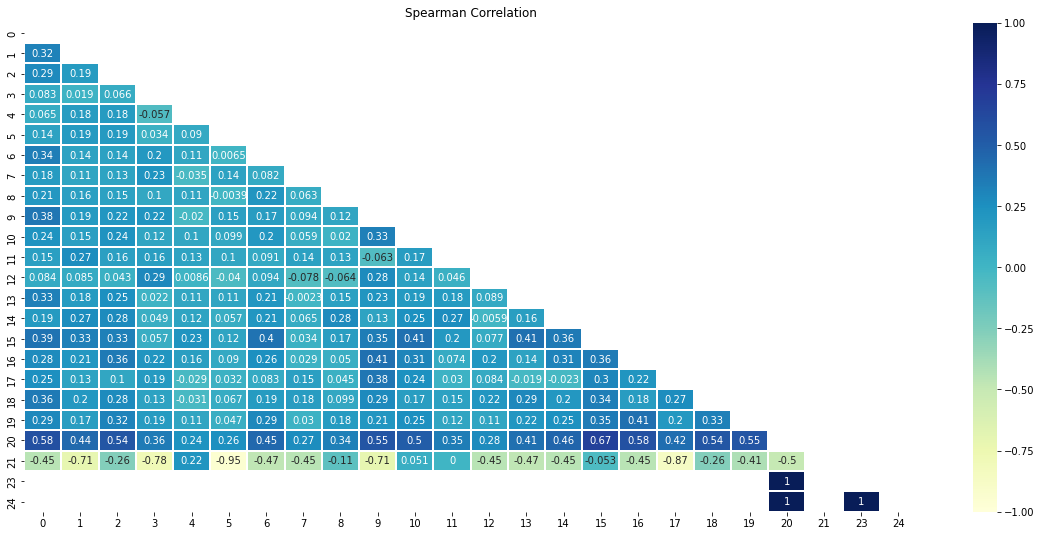

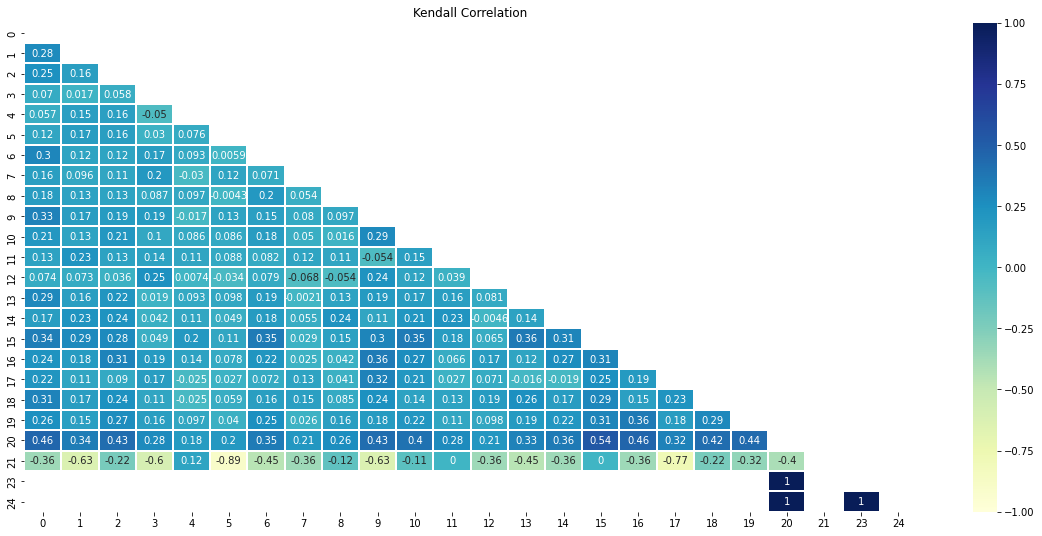

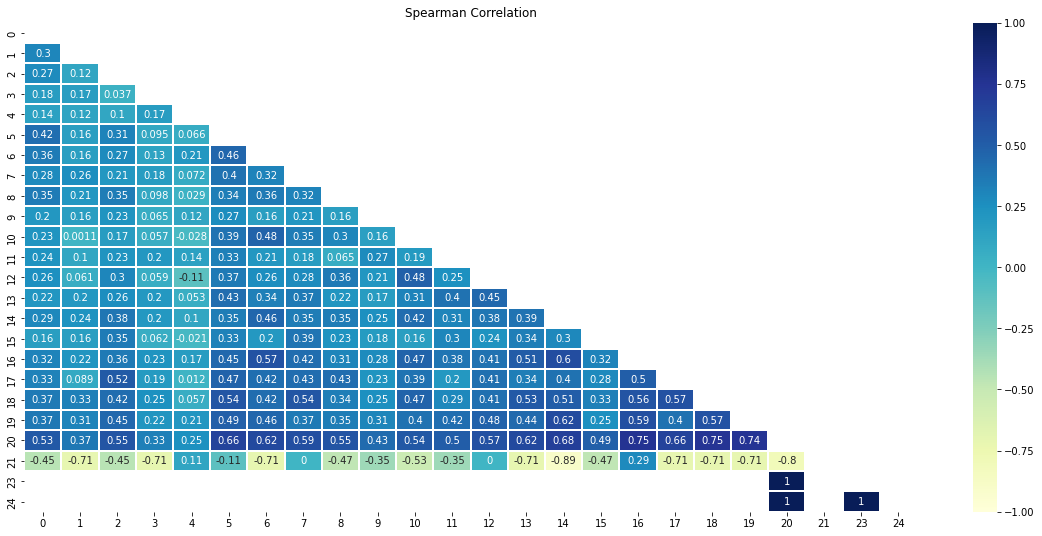

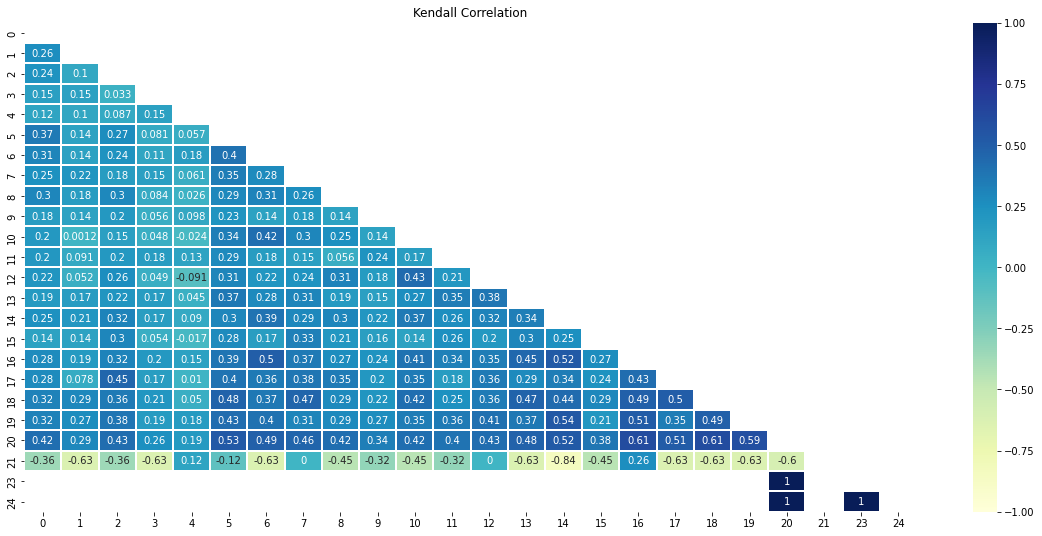

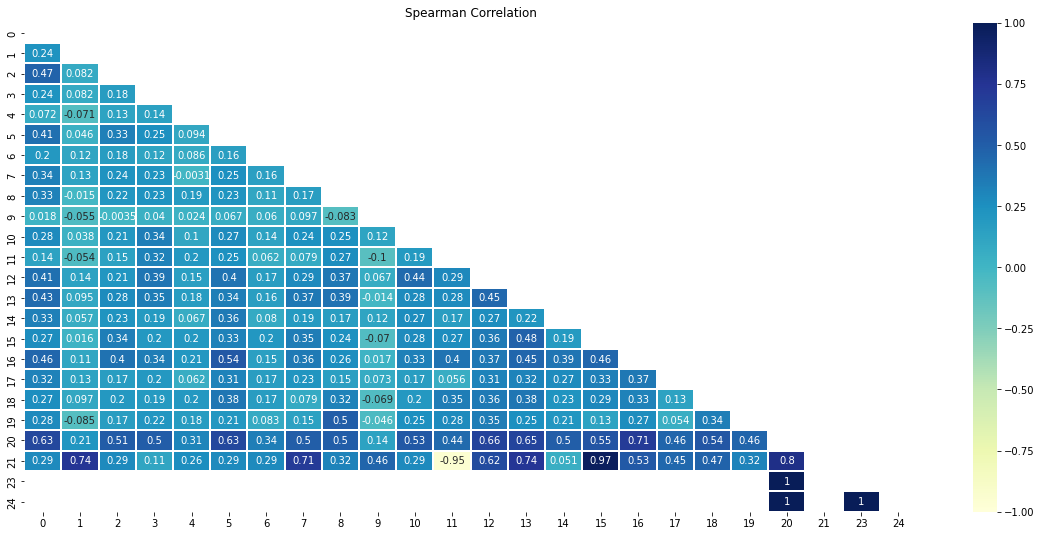

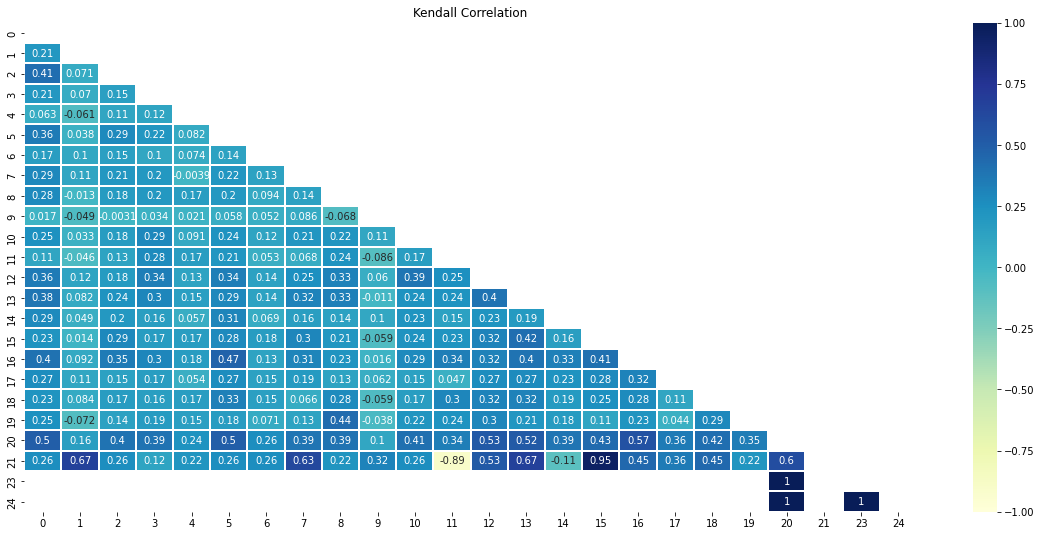

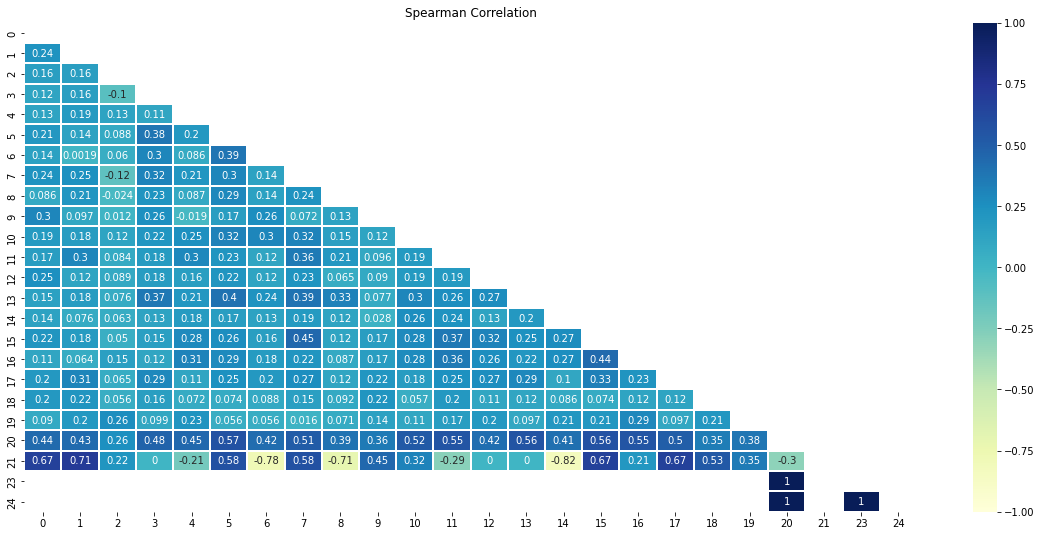

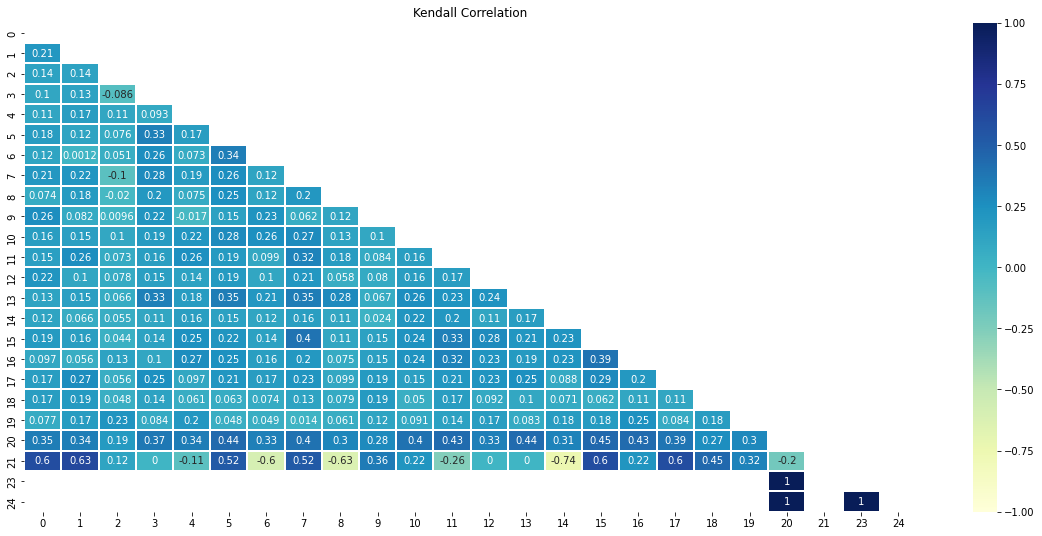

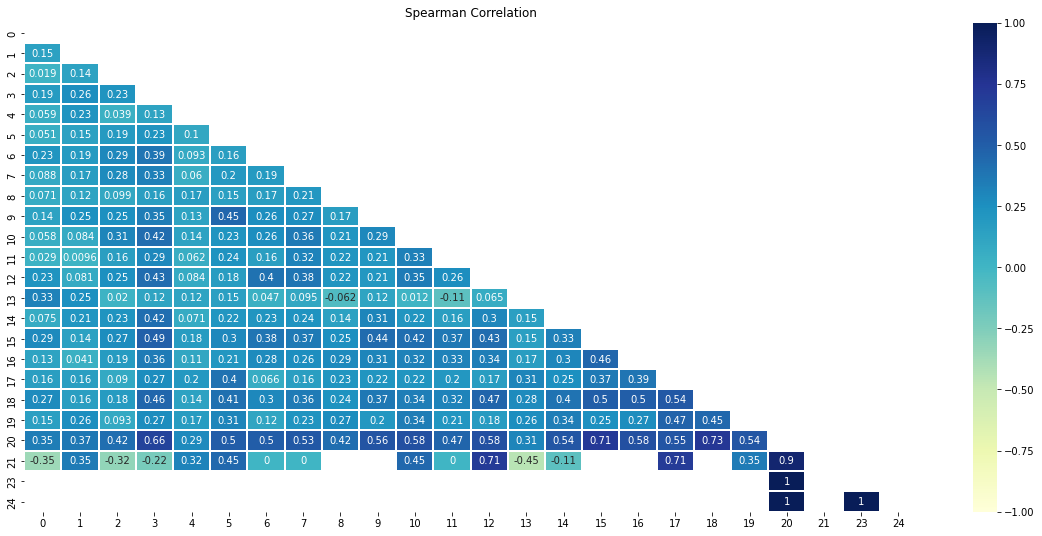

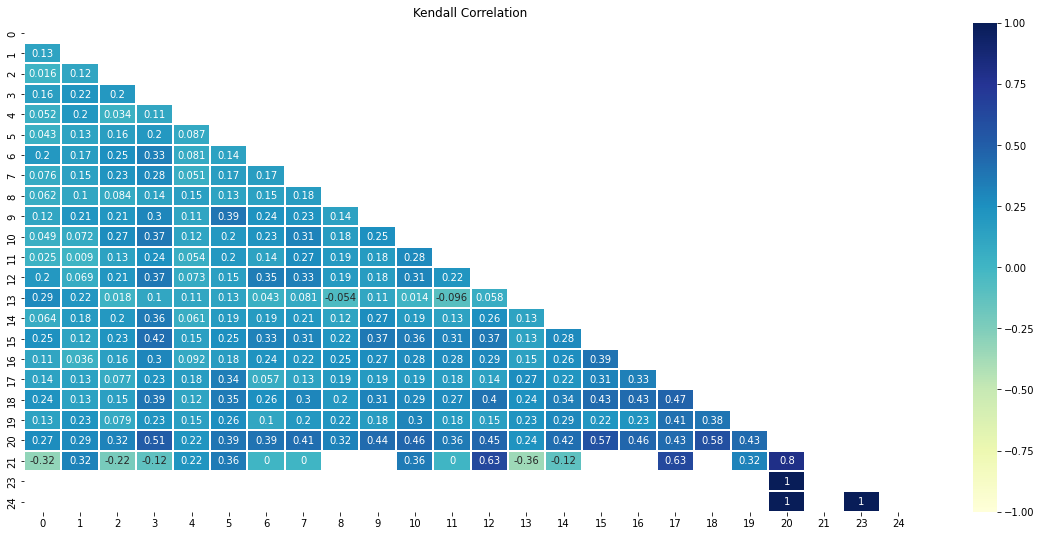

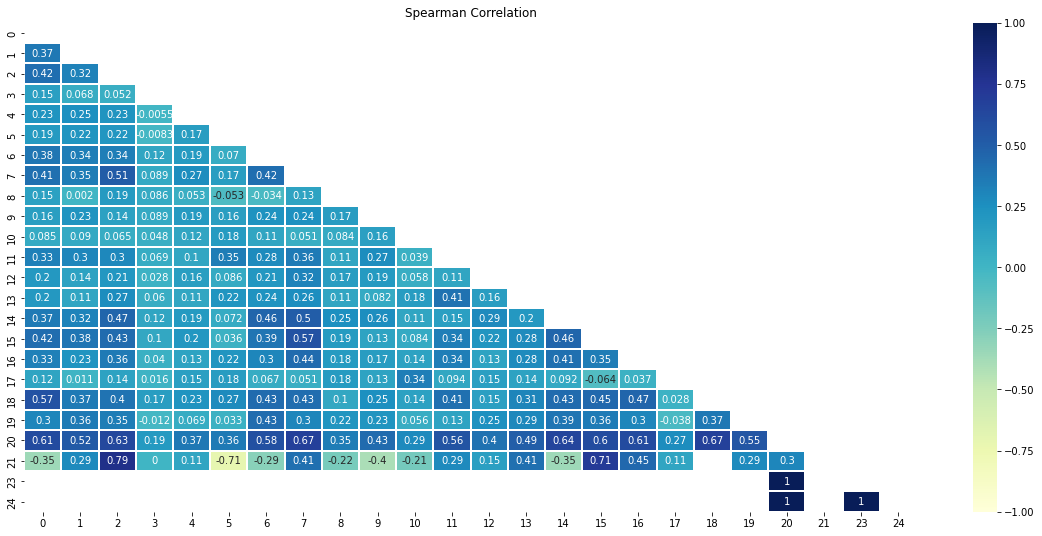

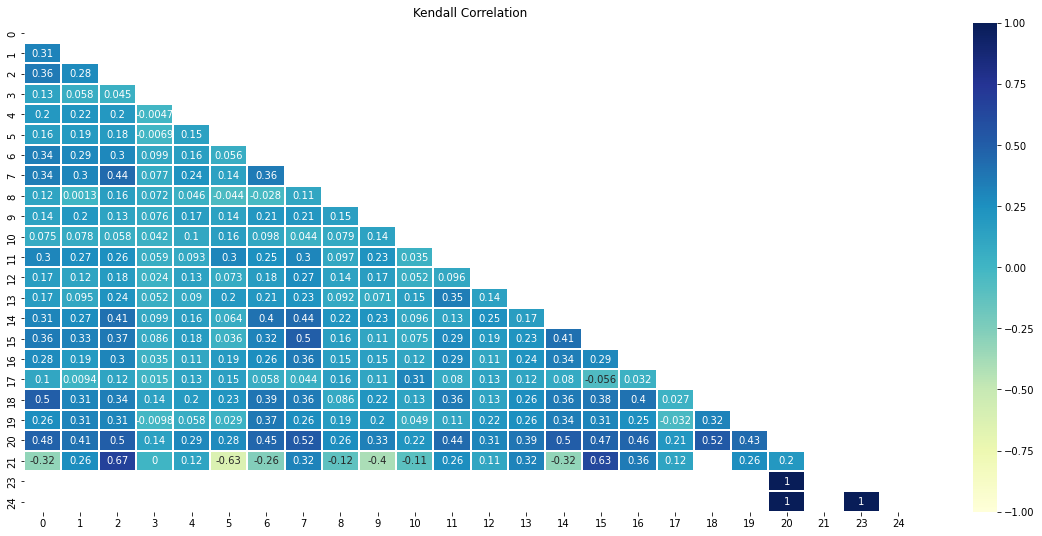

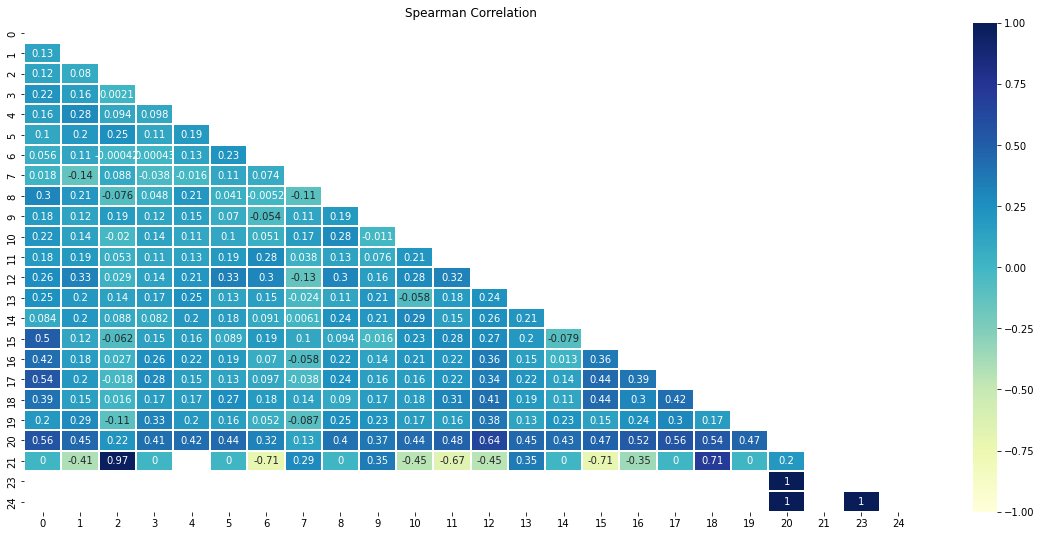

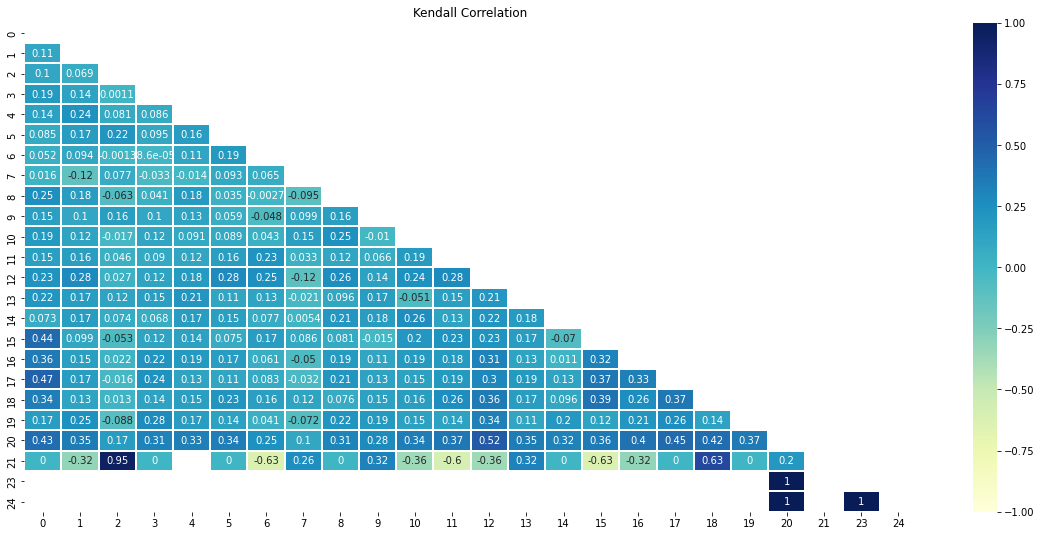

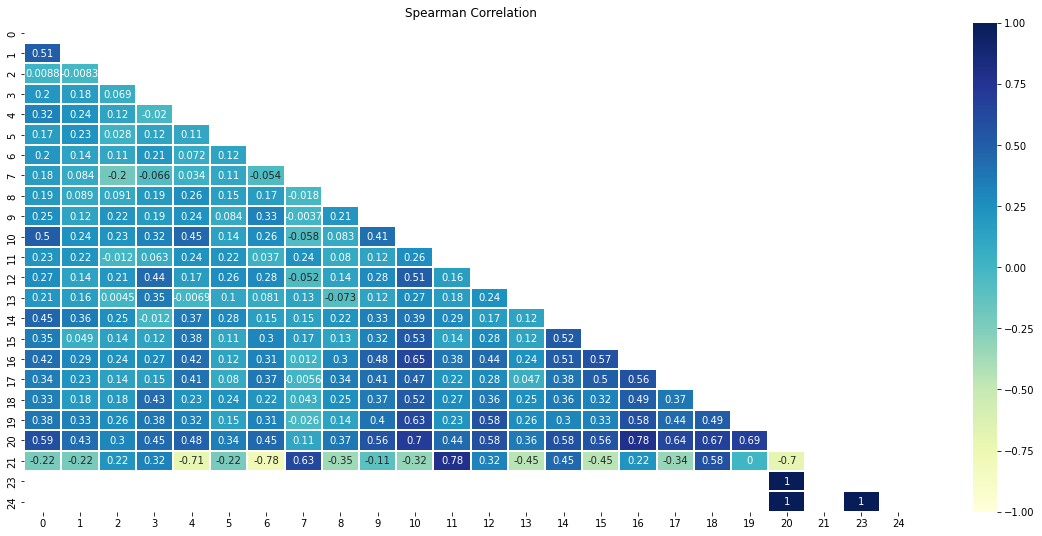

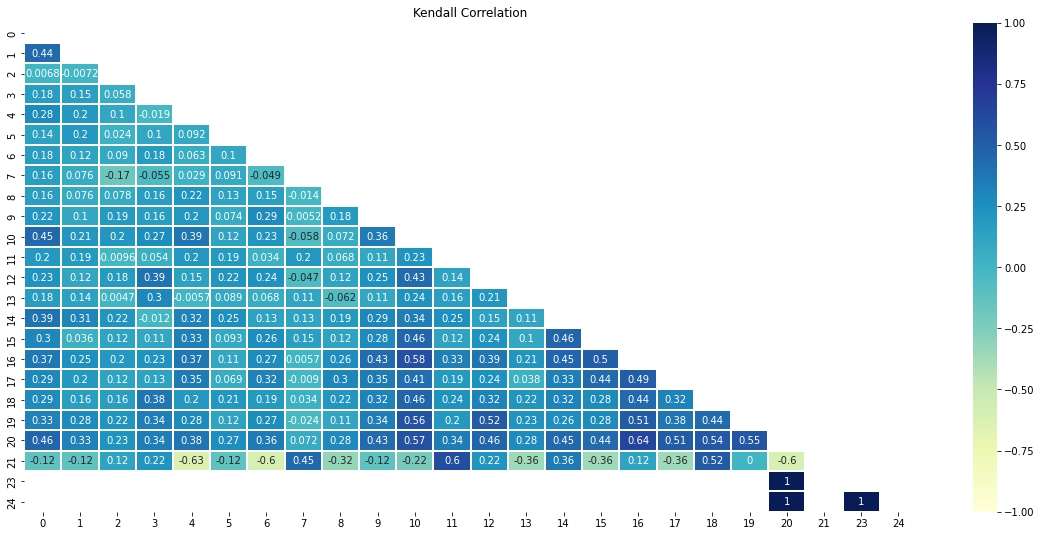

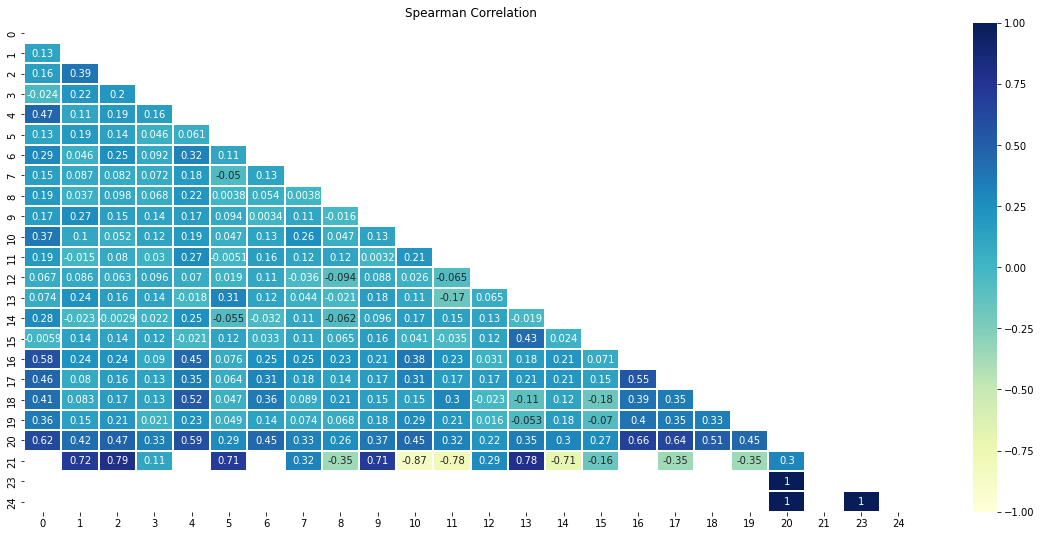

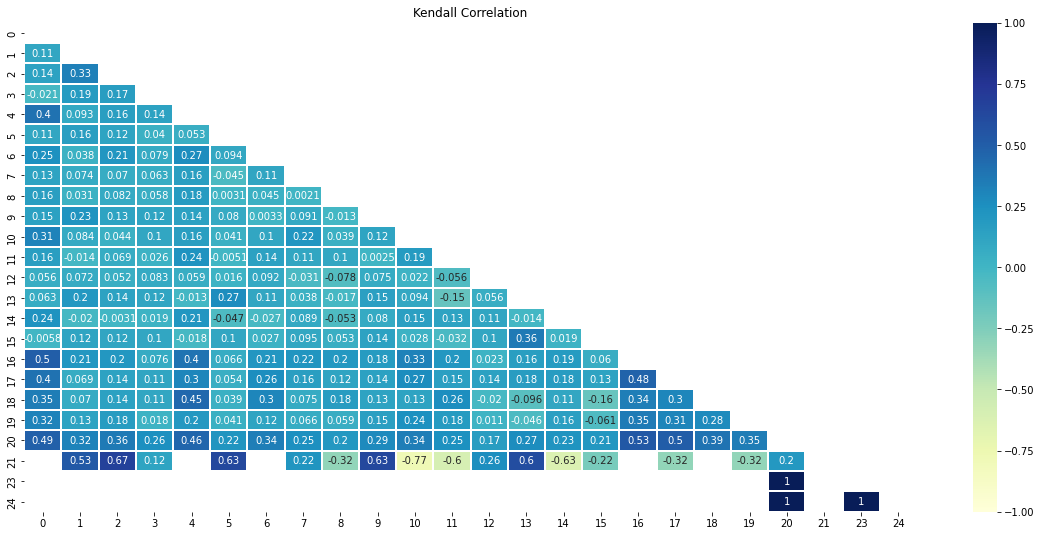

In [ ]:
#finding the spearman and kendal correlation for every category
spearman_sum = []
kendall_sum = []
for i in range(1,51,5):
  #compliling the data for videos in 1 category
  df1=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i+0, header=None)
  df2=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i+1, header=None)
  df3=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i+2, header=None)
  df4=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i+3, header=None)
  df5=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i+4, header=None)
  df_category = pd.concat([df1,df2,df3,df4,df5])
  df_category.loc[:, 20]=list(df_category.mean(axis=1))

  #finding the spearman correlation
  sc=df_category.corr(method="spearman")
  a = sc.sum(axis=0)
  spearman_sum.append(a.sum(axis=0))
  plt.figure(figsize=(20,9))
  mask = np.triu(np.ones_like(df_category.corr(), dtype=np.bool))
  heatmap = sns.heatmap(sc, linewidth=1, mask=mask, vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
  plt.title("Spearman Correlation")

  #finding the kendall correlation
  kc=df_category.corr(method="kendall")
  plt.figure(figsize=(20,9))
  mask = np.triu(np.ones_like(df_category.corr(), dtype=np.bool))
  heatmap = sns.heatmap(kc, linewidth=1, mask=mask, vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
  plt.title("Kendall Correlation")
  b = kc.sum(axis=0)
  kendall_sum.append(b.sum(axis=0))
#printing sum of all spearman and kendall correlation for each category
for i in range(10):
  print(i+1,'|',spearman_sum[i],'|',kendall_sum[i])

### Analysing all videos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()


120.04839199054858
104.8617490629147


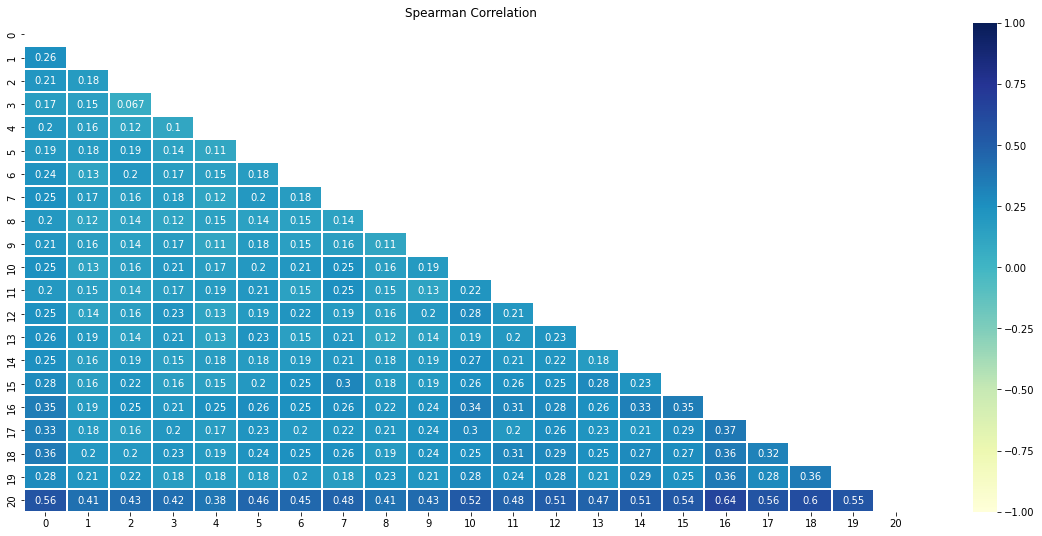

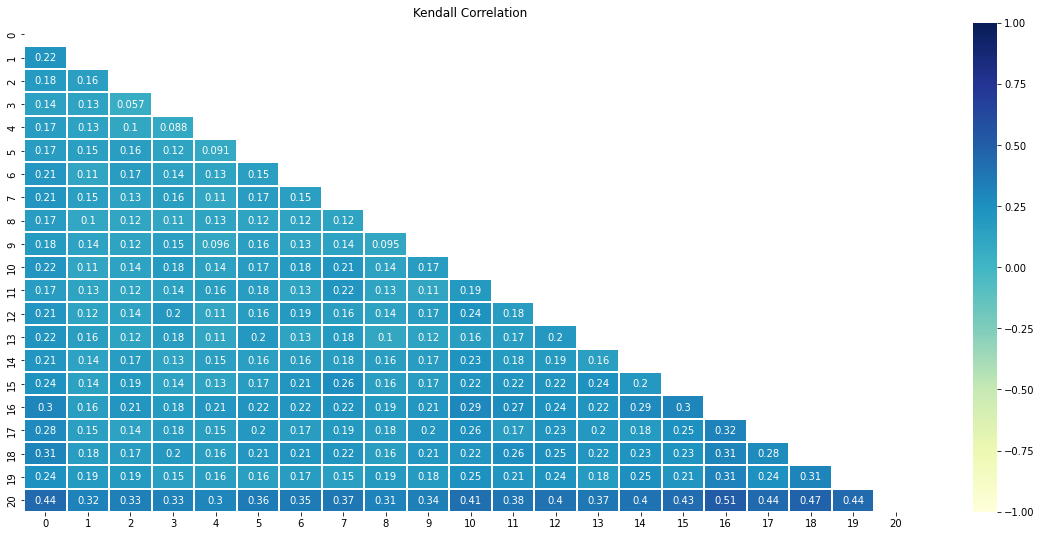

In [ ]:
#finding the spearman and kendall correlation for the whole data
df_full=pd.read_csv('TV50_352353_20.csv', header=None)
df_full.loc[:, 20]=list(df_full.mean(axis=1))
sc=df_full.corr(method="spearman")
plt.figure(figsize=(20,9))
mask = np.triu(np.ones_like(df_full.corr(), dtype=np.bool))
heatmap = sns.heatmap(sc, linewidth=1, mask=mask, vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
plt.title("Spearman Correlation")
kc=df_full.corr(method="kendall")
plt.figure(figsize=(20,9))
mask = np.triu(np.ones_like(df_full.corr(), dtype=np.bool))
heatmap = sns.heatmap(kc, linewidth=1, mask=mask, vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
plt.title("Kendall Correlation")
y = sc.sum(axis=0)
print(y.sum(axis=0))
z = kc.sum(axis=0)
print(z.sum(axis=0))

## GT score

### Finding weights

This section can be executed if we start getting consistent results.

In [ ]:
centroids  = kmeans.cluster_centers_
print(centroids)

In [ ]:
# we are using the clusters formed in 3rd iteration becuase in this case each group has 10 annotators
cluster_1 = list(group_1[3].index)
cluster_2 = list(group_2[3].index)
print(cluster_1,cluster_2)

In [ ]:
# finding distance of points from the centroid
distance_cluster_1 = []
for i in range(len(cluster_1)):
  a = group_1[3].iloc[i]
  dst = distance.euclidean(a, centroids[0])
  distance_cluster_1.append(dst)

In [ ]:
distance_cluster_2 = []
for i in range(len(cluster_2)):
  a = group_2[3].iloc[i]
  dst = distance.euclidean(a, centroids[0])
  distance_cluster_2.append(dst)

In [ ]:
# calculating weights on basis of how far they are from centroid
weights_1 = []
for i in range(len(distance_cluster_1)):
  a = 1 - (distance_cluster_1[i]/sum(distance_cluster_1))
  weights_1.append(a)
weights_2 = []
for i in range(len(distance_cluster_2)):
  a = 1 - (distance_cluster_2[i]/sum(distance_cluster_2))
  weights_2.append(a)
weights_1 = [float(i)/sum(weights_1) for i in weights_1]
weights_2 = [float(i)/sum(weights_2) for i in weights_2]
print(weights_1)
print(weights_2)

### Calculating GT score

In [ ]:
def MultiModeCalc(data):
    """
    set(data) -> discards duplicated values

    list(map(lambda x: data.count(x), set(data))))) -> counting how many of 
    each value there are

    dict(zip(set(data), list(map(lambda x: data.count(x), set(data))))) -> 
    making a dictionary by zipping all unique values(as keys) with their 
    frequency in the data(as values)

    return [i for i in multimode if multimode[i] == max(multimode.values())] 
    -> returning a list of the values that are most frequent in the data 
    """
    multimode = dict(zip(set(data), list(map(lambda x: data.count(x), set(data)))))
    return [i for i in multimode if multimode[i] == max(multimode.values())]

In [ ]:
# calculating GT score by multiplying frame score with the corresponding weights/averaging it
cluster_1 =  [4,8,11,7,15,19,0,18,16,17,10,14]
GT_score_1_average = []
mode_1 = []
for i in range(0,10000,60): #step is 60 because after every 60 frames, the scores change
  total = 0
  temp = []
  for j in cluster_1:
    number = df.iloc[i][j]
    total += number
    temp.append(number) # do some type of calculation to find the right number
  a = MultiModeCalc(temp)
  if len(a) == 1:
    mode_1.append(a[0]) #finding mode
  elif len(a)%2 == 0:
    mode_1.append(mean(a))
  else:
    mode_1.append(a[(len(a)//2)+1])
  GT_score_1_average.append(total/len(cluster_1))

In [ ]:
#repeating the same process for 2nd cluster
cluster_2 =  [2,6,9,3,12,1,5,13]
GT_score_2_average = []
mode_2 = []
for i in range(0,10000,60):
  total = 0
  temp = []
  for j in cluster_2:
    number = df.iloc[i][j]
    total += number
    temp.append(number)
  a = MultiModeCalc(temp)
  if len(a) == 1:
    mode_2.append(a[0])
  elif len(a)%2 == 0:
    mode_2.append(mean(a))
  else:
    mode_2.append(a[(len(a)//2)+1])
  GT_score_2_average.append(total/len(cluster_2))

In [ ]:
#calculatin the average for all annotators to create a baseline for cluster 1 and 2
all = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
GT_score = []
for i in range(0,10000,60):
  total = 0
  for j in all:
    number = df.iloc[i][j]
    total += number
    #abc.append(number)
  GT_score.append(total/len(all))
print(GT_score)

[2.9, 1.7, 1.25, 1.35, 1.3, 1.2, 1.45, 1.35, 1.25, 1.35, 2.5, 1.45, 1.6, 1.85, 1.75, 1.6, 1.65, 1.85, 1.7, 1.65, 1.45, 1.5, 1.15, 1.35, 1.25, 1.25, 1.25, 1.15, 2.35, 1.5, 1.8, 1.3, 1.6, 1.3, 1.25, 1.2, 1.0, 1.7, 2.0, 1.95, 1.85, 1.85, 1.9, 1.65, 1.8, 2.25, 1.85, 2.8, 3.05, 2.5, 2.3, 3.1, 2.65, 2.7, 2.6, 2.6, 1.65, 2.2, 1.75, 2.1, 2.95, 2.8, 2.7, 2.4, 2.55, 2.4, 2.6, 2.45, 2.6, 2.65, 2.2, 3.1, 2.35, 2.25, 2.3, 2.05, 3.0, 1.95, 3.75, 3.0, 2.15, 2.4, 3.0, 2.55, 1.65, 1.85, 2.7, 2.4, 2.6, 2.45, 1.5, 1.5, 1.4, 1.65, 3.8, 2.6, 2.7, 2.45, 2.5, 3.45, 2.65, 1.8, 1.8, 1.85, 3.2, 1.35, 1.35, 2.05, 1.35, 1.5, 1.9, 2.65, 1.95, 2.1, 2.45, 2.6, 2.4, 1.45, 1.85, 1.8, 1.35, 1.45, 1.9, 1.9, 2.5, 2.5, 2.6, 2.5, 2.8, 2.45, 2.7, 2.45, 2.35, 2.0, 2.3, 2.15, 2.1, 3.45, 1.65, 1.7, 1.75, 1.7, 2.95, 1.9, 2.35, 2.1, 1.8, 1.6, 1.65, 1.85, 2.7, 2.05, 2.15, 2.05, 2.0, 1.75, 1.25, 1.2, 1.35, 1.15, 1.45, 1.3, 1.2, 1.35, 1.2, 1.15, 1.25]


In [ ]:
x_axis = []
for i in range(167):
  x_axis.append(i)

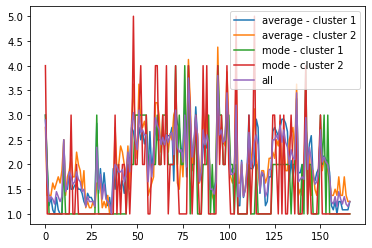

In [ ]:
#plotting the data - average
plt.plot(x_axis, GT_score_1_average, label='average - cluster 1')
plt.plot(x_axis, GT_score_2_average, label='average - cluster 2')
plt.plot(x_axis, mode_1, label = "mode - cluster 1" )
plt.plot(x_axis, mode_2, label = "mode - cluster 2" )
plt.plot(x_axis, GT_score, label='all')
plt.legend()

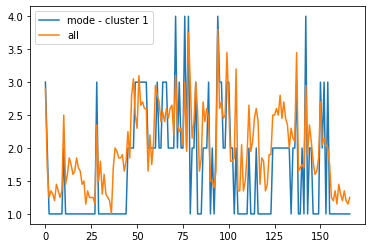

In [ ]:
#plotting the data - mode
plt.plot(x_axis, mode_1, label = "mode - cluster 1" )
#plt.plot(x_axis, mode_2, label = "mode - cluster 2" )
plt.plot(x_axis, GT_score, label='all')
plt.legend()

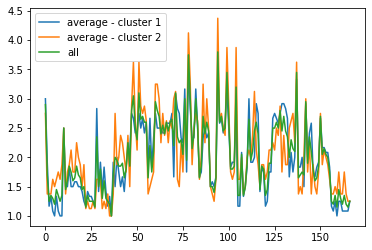

In [ ]:
plt.plot(x_axis, GT_score_1_average, label='average - cluster 1')
plt.plot(x_axis, GT_score_2_average, label='average - cluster 2')
plt.plot(x_axis, GT_score, label='all')
plt.legend()

cluster segmented scores


END GOAL - better representation of all the mode

### Comparing with original GT scores

In [ ]:
#still not sure what this section does

import h5py
tvsum_h5 = h5py.File('eccv16_dataset_tvsum_google_pool5.h5', 'r') #getting the originial GT scores from the h5 file
gt_scores = []
for i in range(1,51):
  gt_scores.append(list(tvsum_h5["video_"+str(i)]['gtscore'][:]))
final_gt_score = [ item for elem in gt_scores for item in elem] # breaking down the nested list and taking every 4th element


In [ ]:
zGT_score_1 += [1,1,1,1,1]

In [ ]:
GT_score_1= [float(i)/max(GT_score_1) for i in GT_score_1] #normalizing the data
gt_scores= [float(i)/max(gt_scores) for i in gt_scores]

In [ ]:
x_axis = []
for i in range(5878):
  x_axis.append(i)
plt.plot(x_axis, GT_score_1, label='cluster 1')
plt.plot(x_axis, gt_scores, label='original')

In [ ]:
# calculating GT score by multiplying frame score with the corresponding weights
GT_score_1 = []
for i in range(0,352353,60): #step is 60 because after every 60 frames, the scores change
  total = 0
  for j in range(len(cluster_1)):
    number = df.iloc[i][j]*(1/3)
    total += number
    #abc.append(number)
  GT_score_1.append(total)
print(GT_score_1)

In [ ]:
GT_score_1 += [1,1,1,1,1]
GT_score_1= [float(i)/max(GT_score_1) for i in GT_score_1]
gt_scores= [float(i)/max(gt_scores) for i in gt_scores]

In [ ]:
x_axis = []
for i in range(5878):
  x_axis.append(i)
plt.plot(x_axis, GT_score_1, label='cluster 1')
plt.plot(x_axis, gt_scores, label='original')

In [ ]:
plt.plot(x_axis, GT_score_1, label='cluster 1')
plt.show()
plt.plot(x_axis, gt_scores, label='original')

In [ ]:
lst = []
for i in range(len(gt_scores)):
  lst.append(GT_score_1[i]-gt_scores[i])
print(lst)


In [ ]:
print(np.corrcoef(GT_score_1,gt_scores))

In [ ]:
#difference in GT score for each category
# compare mode and GT scores

In [ ]:
plt.plot(x_axis, lst, label='difference')

## DBSCAN

In [ ]:
# Implementing  DBSCAN
db = DBSCAN(eps=730,min_samples = 4).fit(scaled_df.T) #eps - radius of the circle
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 5


In [ ]:
#printing the annotators classified into a cluster and as noise
noise = []
core = []
for i in range(len(labels)):
  if labels[i] == 0:
    core.append(i)
  else:
    noise.append(i)
print("The annotators classified as noise: ",noise)
print("The annotators classified into a cluster",core) 

The annotators classified as noise:  [2, 3, 4, 8, 9]
The annotators classified into a cluster [0, 1, 5, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


0.9307404569476081

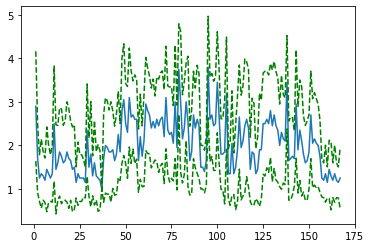

In [ ]:
#plotting standard deviation and GT score for all the data
all = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
GT_score = []
stdev_all_GT = []
df = pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=1, header=None)
for i in range(0,10000,60):
  total = 0
  abc = []
  for j in all:
    number = df.iloc[i][j]
    total += number
    abc.append(number)
  stdev_all_GT.append(np.std(abc))
  GT_score.append(total/len(all))
upper,lower = [],[]
for i in range(len(GT_score)):
  upper.append(GT_score[i]+stdev_all_GT[i])
  lower.append(GT_score[i]-stdev_all_GT[i])
#plt.plot(x_axis, mode_, label='mode - all')
plt.plot(list(range(1,168)), GT_score, label='GT - all')
plt.plot(list(range(1,168)), upper, label='Standard Deviation - upper', c = 'g', linestyle = 'dashed')
plt.plot(list(range(1,168)), lower, label='Standard Deviation - lower', c = 'g',linestyle = 'dashed')
statistics.mean(stdev_all_GT) #average standard deviation of the whole data

In [ ]:
#plotting standard deviation and GT score for all the data
all = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
GT_score = []
stdev_all_GT = []
for i in range(0,352353,60):
  total = 0
  abc = []
  for j in all:
    number = df.iloc[i][j]
    total += number
    abc.append(number)
  stdev_all_GT.append(np.std(abc))
  GT_score.append(total/len(all))

In [ ]:
sum(stdev_all_GT)/len(stdev_all_GT)

0.947750779070638

0.8667528386300877

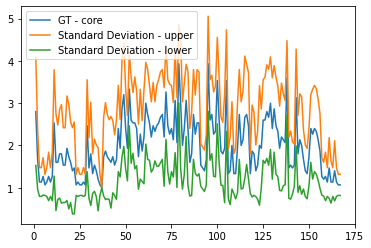

In [ ]:
#plotting standard deviation and GT score for all annotators excluding noise
core = [0,1,5,6,7,10,11,12,13,14,15,16,17,18,19]
GT_score_core = []
stdev_core_GT = []
df = pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=1, header=None)
for i in range(0,10000,60):
  total = 0
  abc = []
  for j in core:
    number = df.iloc[i][j]
    total += number
    abc.append(number)
  stdev_core_GT.append(np.std(abc))
  GT_score_core.append(total/len(core))
upper,lower = [],[]
for i in range(len(GT_score_core)):
  upper.append(GT_score_core[i]+stdev_core_GT[i])
  lower.append(GT_score_core[i]-stdev_core_GT[i])
#plt.plot(x_axis, mode_, label='mode - all')
plt.plot(list(range(1,168)), GT_score_core, label='GT - core')
plt.plot(list(range(1,168)), upper, label='Standard Deviation - upper')
plt.plot(list(range(1,168)), lower, label='Standard Deviation - lower')
plt.legend()
statistics.mean(stdev_core_GT)

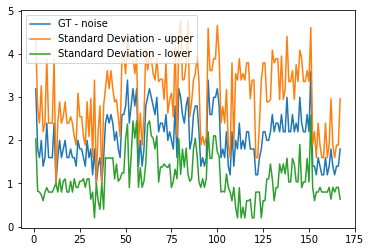

In [ ]:
#plotting standard deviation and GT score for all annotators considered nois
noise = [2,3,4,8,9]
GT_score_noise = []
stdev_noise_GT = []
for i in range(0,10000,60):
  total = 0
  abc = []
  for j in noise:
    number = df.iloc[i][j]
    total += number
    abc.append(number)
  stdev_noise_GT.append(np.std(abc))
  GT_score_noise.append(total/len(noise))
upper,lower = [],[]
for i in range(len(GT_score_noise)):
  upper.append(GT_score_noise[i]+stdev_noise_GT[i])
  lower.append(GT_score_noise[i]-stdev_noise_GT[i])
#plt.plot(x_axis, mode_, label='mode - all')
plt.plot(list(range(1,168)), GT_score_noise, label='GT - noise')
plt.plot(list(range(1,168)), upper, label='Standard Deviation - upper')
plt.plot(list(range(1,168)), lower, label='Standard Deviation - lower')
plt.legend()
statistics.mean(stdev_noise_GT)

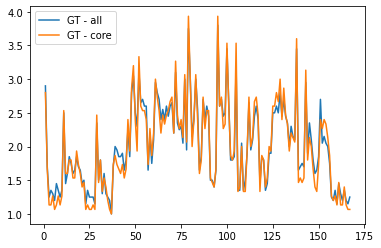

In [ ]:
plt.plot(list(range(1,168)), GT_score, label='GT - all')
plt.plot(list(range(1,168)), GT_score_core, label='GT - core')
plt.legend()

### Score distribution

In [ ]:
all = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
GT_score = []
df = pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=44, header=None)
for i in range(len(df)):
  total = 0
  abc = []
  for j in all:
    number = df.iloc[i][j]
    total += number
    abc.append(number)
  GT_score.append(total/len(all))

In [ ]:
sum(GT_score)/len(GT_score)

1.9463986988847646

In [ ]:
import statistics
statistics.stdev(GT_score)

0.7018507752845596

In [ ]:
# finding the distribution of points in the above graph
counts = []
count_1,count_2,count_3,count_4,count_5 = 0,0,0,0,0
for i in GT_score:
  if i <= 1.8:
    count_1 += 1
  elif i <= 2.6:
    count_2 += 1
  elif i <= 3.4:
    count_3 += 1
  elif i <= 4.2:
    count_4 += 1
  else:
    count_5 += 1
counts.append([count_1,count_2,count_3,count_4,count_5])

In [ ]:
counts[0]

[2505, 1200, 180, 419, 0]

(array([300., 298., 480., 419., 240., 120., 120., 240.,  60., 168.,  60.,
        120., 180., 120.,  60., 120.,   0.,   0.,   0.,   0., 180., 120.,
        120.,   0.,   0., 120.,  60.,   0.,   0.,   0.,   0.,   0.,   0.,
         60.,   0.,   0.,   0.,  60.,   0.,  60.,   0.,   0.,   0.,  60.,
        120.,  59.,  60.,   0.,  60.,  60.]),
 array([1.25 , 1.301, 1.352, 1.403, 1.454, 1.505, 1.556, 1.607, 1.658,
        1.709, 1.76 , 1.811, 1.862, 1.913, 1.964, 2.015, 2.066, 2.117,
        2.168, 2.219, 2.27 , 2.321, 2.372, 2.423, 2.474, 2.525, 2.576,
        2.627, 2.678, 2.729, 2.78 , 2.831, 2.882, 2.933, 2.984, 3.035,
        3.086, 3.137, 3.188, 3.239, 3.29 , 3.341, 3.392, 3.443, 3.494,
        3.545, 3.596, 3.647, 3.698, 3.749, 3.8  ]),
 <a list of 50 Patch objects>)

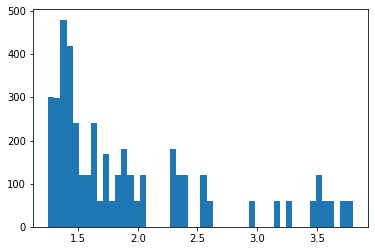

In [ ]:
plt.hist(GT_score, 50)

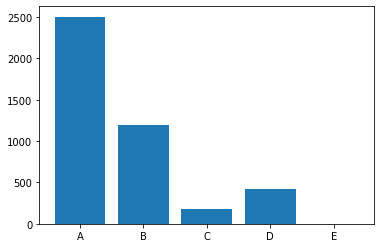

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make a random dataset:
height = counts[0]
bars = ('A', 'B', 'C', 'D', 'E')
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

In [ ]:
core = [0,1,5,6,7,10,11,12,13,14,15,16,17,18,19]
GT_score_core = []
for i in range(0,352353,30):
  total = 0
  abc = []
  for j in core:
    number = df.iloc[i][j]
    total += number
    abc.append(number)
  GT_score_core.append(total/len(core))

In [ ]:
count_1,count_2,count_3,count_4,count_5 = 0,0,0,0,0
for i in GT_score_core:
  if i <= 1.8:
    count_1 += 1
  elif i <= 2.6:
    count_2 += 1
  elif i <= 3.4:
    count_3 += 1
  elif i <= 4.2:
    count_4 += 1
  else:
    count_5 += 1
counts.append([count_1,count_2,count_3,count_4,count_5])

In [ ]:
counts

[[5412, 4777, 1423, 129, 5], [5585, 4423, 1536, 195, 7]]

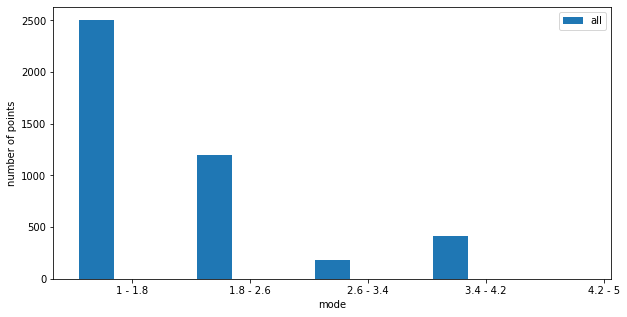

In [ ]:
# Numbers of pairs of bars you want
N = 5

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (23, 25, 17)
# Specify the values of orange bars (height)
orange_bar = (19, 18, 14)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, counts[0] , width, label='all')




# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width, ('1 - 1.8','1.8 - 2.6','2.6 - 3.4','3.4 - 4.2','4.2 - 5'))

plt.xlabel("mode")
plt.ylabel("number of points")

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

### Geometric mean

In [ ]:

# function to calculate geometric
# mean and return float value.
def geometricMean(arr) :
    n = len(arr)
    # declare product variable and
    # initialize it to 1.
    product = 1
     
    # Compute the product of all the
    # elements in the array.
    for i in range(0,n) :
        product = product * arr[i]
  
    # compute geometric mean through
    # formula pow(product, 1/n) and
    # return the value to main function.
    gm = (float)(math.pow(product, (1 / n)))
    return gm
     
     
# Driver function
arr = [ 1, 2, 3, 4, 5, 6, 7, 8]
 
# to print 6 digits after decimal
print (geometricMean(arr))

3.764350599503129


In [ ]:
all = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
GT_score = []
for i in range(0,352353,30):
  abc = []
  for j in all:
    number = df.iloc[i][j]
    abc.append(number)
  gm = geometricMean(abc)
  GT_score.append(gm)

In [ ]:
core = [0,1,5,6,7,10,11,12,13,14,15,16,17,18,19]
GT_score_core = []
for i in range(0,352353,30):
  abc = []
  for j in core:
    number = df.iloc[i][j]
    abc.append(number)
  gm = geometricMean(abc)
  GT_score_core.append(gm)

In [ ]:
# finding the distribution of points in the above graph
counts = []
count_1,count_2,count_3,count_4,count_5 = 0,0,0,0,0
for i in GT_score:
  if i <= 1.8:
    count_1 += 1
  elif i <= 2.6:
    count_2 += 1
  elif i <= 3.4:
    count_3 += 1
  elif i <= 4.2:
    count_4 += 1
  else:
    count_5 += 1
counts.append([count_1,count_2,count_3,count_4,count_5])

In [ ]:
count_1,count_2,count_3,count_4,count_5 = 0,0,0,0,0
for i in GT_score_core:
  if i <= 1.8:
    count_1 += 1
  elif i <= 2.6:
    count_2 += 1
  elif i <= 3.4:
    count_3 += 1
  elif i <= 4.2:
    count_4 += 1
  else:
    count_5 += 1
counts.append([count_1,count_2,count_3,count_4,count_5])

In [ ]:
counts

[[7138, 3820, 735, 51, 2], [6941, 3775, 934, 92, 4]]

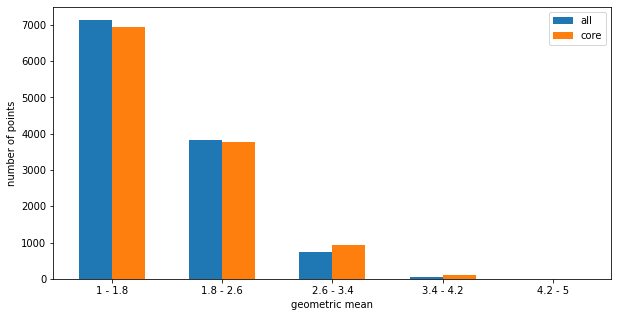

In [ ]:
# Numbers of pairs of bars you want
N = 5

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (23, 25, 17)
# Specify the values of orange bars (height)
orange_bar = (19, 18, 14)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, counts[0] , width, label='all')
plt.bar(ind + width,counts[1], width, label='core')



# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('1 - 1.8','1.8 - 2.6','2.6 - 3.4','3.4 - 4.2','4.2 - 5'))

plt.xlabel("geometric mean")
plt.ylabel("number of points")

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

### Root mean square

In [ ]:
all = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
GT_score = []
for i in range(0,352353,30):
  abc = []
  for j in all:
    number = df.iloc[i][j]
    abc.append(number)
  abc = np.array(abc)
  GT_score.append(np.sqrt(np.mean(abc**2)))

In [ ]:
core = [0,1,5,6,7,10,11,12,13,14,15,16,17,18,19]
GT_score_core = []
for i in range(0,352353,30):
  abc = []
  for j in core:
    number = df.iloc[i][j]
    abc.append(number)
  abc = np.array(abc)
  GT_score_core.append(np.sqrt(np.mean(abc**2)))

In [ ]:
# finding the distribution of points in the above graph
counts = []
count_1,count_2,count_3,count_4,count_5 = 0,0,0,0,0
for i in GT_score:
  if i <= 1.8:
    count_1 += 1
  elif i <= 2.6:
    count_2 += 1
  elif i <= 3.4:
    count_3 += 1
  elif i <= 4.2:
    count_4 += 1
  else:
    count_5 += 1
counts.append([count_1,count_2,count_3,count_4,count_5])

In [ ]:
count_1,count_2,count_3,count_4,count_5 = 0,0,0,0,0
for i in GT_score_core:
  if i <= 1.8:
    count_1 += 1
  elif i <= 2.6:
    count_2 += 1
  elif i <= 3.4:
    count_3 += 1
  elif i <= 4.2:
    count_4 += 1
  else:
    count_5 += 1
counts.append([count_1,count_2,count_3,count_4,count_5])

In [ ]:
counts

[[3463, 5347, 2570, 355, 11], [3785, 4909, 2548, 486, 18]]

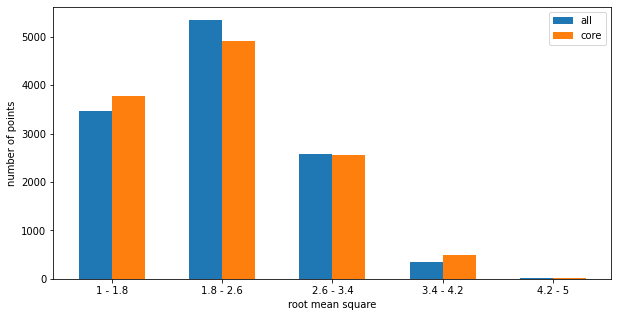

In [ ]:
# Numbers of pairs of bars you want
N = 5

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (23, 25, 17)
# Specify the values of orange bars (height)
orange_bar = (19, 18, 14)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, counts[0] , width, label='all')
plt.bar(ind + width,counts[1], width, label='core')



# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('1 - 1.8','1.8 - 2.6','2.6 - 3.4','3.4 - 4.2','4.2 - 5'))

plt.xlabel("root mean square")
plt.ylabel("number of points")

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

### Mode distribution

In [ ]:
# finding the mode for the data - all
mode_ = []
for i in range(0,352353,30):
  total = 0
  temp = []
  for j in all: # can be used to calculate the mode for core and noise - change 'all'
    number = df.iloc[i][j]
    total += number
    temp.append(number)
  a = MultiModeCalc(temp)
  if len(a) == 1:
    mode_.append(a[0])
  elif len(a)%2 == 0:
    mode_.append(mean(a))
  else:
    mode_.append(a[(len(a)//2)+1])

In [ ]:
# finding mode of core data
mode_1 = []
for i in range(0,352353,30):
  total = 0
  temp = []
  for j in core: # can be used to calculate the mode for core and noise - change 'all'
    number = df.iloc[i][j]
    total += number
    temp.append(number)
  a = MultiModeCalc(temp)
  if len(a) == 1:
    mode_1.append(a[0])
  elif len(a)%2 == 0:
    mode_1.append(mean(a))
  else:
    mode_1.append(a[(len(a)//2)+1])

In [ ]:
counts = []
count_1,count_2,count_3,count_4,count_5 = 0,0,0,0,0
for i in mode_:
  if i == 1:
    count_1 += 1
  elif i == 2:
    count_2 += 1
  elif i == 3:
    count_3 += 1
  elif i == 4:
    count_4 += 1
  else:
    count_5 += 1
counts.append([count_1,count_2,count_3,count_4,count_5])

In [ ]:
count_1,count_2,count_3,count_4,count_5 = 0,0,0,0,0
for i in mode_1:
  if i == 1:
    count_1 += 1
  elif i == 2:
    count_2 += 1
  elif i == 3:
    count_3 += 1
  elif i == 4:
    count_4 += 1
  else:
    count_5 += 1
counts.append([count_1,count_2,count_3,count_4,count_5])

In [ ]:
counts

[[7596, 2631, 1079, 308, 132], [7355, 2624, 1203, 420, 144]]

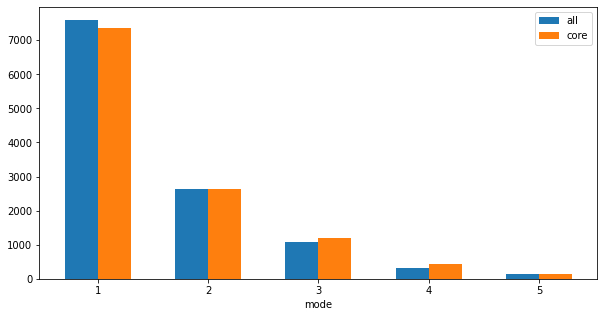

In [ ]:
# Numbers of pairs of bars you want
N = 5

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (23, 25, 17)
# Specify the values of orange bars (height)
orange_bar = (19, 18, 14)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, counts[0] , width, label='all')
plt.bar(ind + width,counts[1], width, label='core')



# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('1','2','3','4','5'))
plt.xlabel("mode")
plt.ylabel("number of points")

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

### Plot

In [ ]:
counts = [[5412, 4777, 1423, 129, 5], [5585, 4423, 1536, 195, 7],[7138, 3820, 735, 51, 2], [6941, 3775, 934, 92, 4],
          [3463, 5347, 2570, 355, 11], [3785, 4909, 2548, 486, 18]]

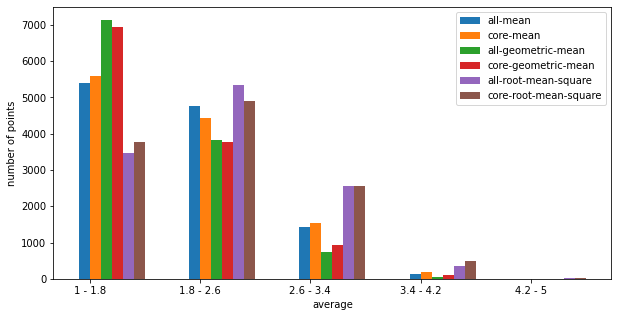

In [ ]:
# Numbers of pairs of bars you want
N = 5

# Data on X-axis

# Specify the values of blue bars (height)
blue_bar = (23, 25, 17)
# Specify the values of orange bars (height)
orange_bar = (19, 18, 14)

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.1       

# Plotting
plt.bar(ind, counts[0] , width, label='all-mean')
plt.bar(ind + width,counts[1], width, label='core-mean')
plt.bar(ind + (2*width), counts[2] , width, label='all-geometric-mean')
plt.bar(ind + (3*width),counts[3], width, label='core-geometric-mean')
plt.bar(ind + (4*width), counts[4] , width, label='all-root-mean-square')
plt.bar(ind + (5*width),counts[5], width, label='core-root-mean-square')


# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('1 - 1.8','1.8 - 2.6','2.6 - 3.4','3.4 - 4.2','4.2 - 5'))

plt.xlabel("average")
plt.ylabel("number of points")

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

## Test

In [ ]:
#calculating mahalanobis distance - for K-means
'''Runs out of  RAM because it involves calculating inverse of a matrix'''
import scipy as stats
from scipy.stats import chi2
def calculateMahalanobis(y=None, data=None, cov=None):
  
    y_mu = y - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(y_mu, inv_covmat)
    mahal = np.dot(left, y_mu.T)
    return mahal.diagonal()
df['Mahalanobis'] = calculateMahalanobis(y=df.T, data=df.T)
  
# calculate p-value for each mahalanobis distance
df['p'] = 1 - chi2.cdf(df['Mahalanobis'], 3)
  
# display first five rows of dataframe
print(df)

## Reliability Estimates

### Cronbach Alpha

In [ ]:
!pip install pingouin

In [ ]:
import pingouin as pg
pg.cronbach_alpha(df.T) #using pinguoin library to calculate cronbach alpha

In [ ]:
def CronbachAlpha(itemscores): #function to calculate cronbach alpha
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=1, ddof=1)
    tscores = itemscores.sum(axis=0)
    nitems = len(itemscores)

    return nitems / (nitems-1.) * (1 - itemvars.sum() / tscores.var(ddof=1))

In [ ]:
df = pd.DataFrame({'Q1': [1, 2, 2, 3, 2, 2, 3, 3, 2, 3],
                   'Q2': [1, 1, 1, 2, 3, 3, 2, 3, 3, 3],
                   'Q3': [1, 1, 2, 1, 2, 3, 3, 3, 2, 3]})
CronbachAlpha(df.T)

0.7734375000000003

In [ ]:
df = pd.DataFrame({'Q3': [1, 1, 2, 1, 2, 3, 3, 3, 2, 3],
                   'Q1': [1, 2, 2, 3, 2, 2, 3, 3, 2, 3],
                   'Q2': [1, 1, 1, 2, 3, 3, 2, 3, 3, 3]})
CronbachAlpha(df.T)

0.7734375000000003

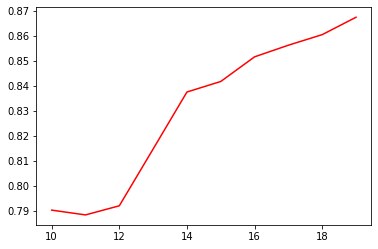

In [ ]:
#analyzing how cronbach alpha changes when calculating for 10 randomly chosen annotators and then adding one until it reaches 20
all = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
chosen = []
lst = []
for i in range(20):
  if i < 10:
    random_num = random.choice(all)
    chosen.append(random_num)
  else:
    random_num = random.choice(all)
    chosen.append(random_num)
    test_df = df[chosen]
    lst.append(CronbachAlpha(test_df.T))
plt.plot([l for l in range(10,20)],lst,color = 'red') #plotting the cronbach alpha vs # of annotators graph

        13  14  16  18  10  17  7   17  10  13  7   12  7   11  1   3   4   \
0        1   3   1   3   3   5   5   5   3   1   5   4   5   2   2   4   2   
1        1   3   1   3   3   5   5   5   3   1   5   4   5   2   2   4   2   
2        1   3   1   3   3   5   5   5   3   1   5   4   5   2   2   4   2   
3        1   3   1   3   3   5   5   5   3   1   5   4   5   2   2   4   2   
4        1   3   1   3   3   5   5   5   3   1   5   4   5   2   2   4   2   
...     ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
352348   1   1   1   3   1   2   1   2   1   1   1   1   1   2   1   1   2   
352349   1   1   1   3   1   2   1   2   1   1   1   1   1   2   1   1   2   
352350   1   1   1   3   1   2   1   2   1   1   1   1   1   2   1   1   2   
352351   1   1   1   3   1   2   1   2   1   1   1   1   1   2   1   1   2   
352352   1   1   1   3   1   2   1   2   1   1   1   1   1   2   1   1   2   

        2   8   9   
0        3   2   5  
1        3   2   5  


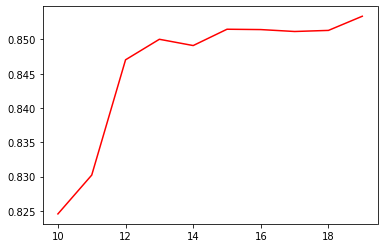

In [ ]:
# same thing as above cell, but this time the last 5 annotators are noise as classified by DBSCAN
# more specifically, the last 3 are annotator 2,8,9 which were also classified as noise for segment data
core = [0,1,5,6,7,10,11,12,13,14,15,16,17,18,19]
chosen = []
lst_1 = []
for i in range(15):
  if i < 10:
    random_num = random.choice(core)
    chosen.append(random_num)
  else:
    random_num = random.choice(core)
    chosen.append(random_num)
    test_df = df[chosen]
    lst_1.append(CronbachAlpha(test_df.T))
for j in [3, 4, 2, 8, 9]:
  chosen.append(j)
  test_df = df[chosen]
  lst_1.append(CronbachAlpha(test_df.T))
print(test_df)
plt.plot([l for l in range(10,20)],lst_1,color = 'red') #ploting the data 

In [ ]:
def random_plot(df):
  all = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
  chosen = []
  lst = []
  for i in range(20):
    if i < 10:
      random_num = random.choice(all)
      chosen.append(random_num)
      all.remove(random_num)
    else:
      random_num = random.choice(all)
      chosen.append(random_num)
      test_df = df[chosen]
      lst.append(CronbachAlpha(test_df.T))
      all.remove(random_num)

  core = [0,1,5,6,7,10,11,12,13,14,15,16,17,18,19]
  chosen = []
  lst_1 = []
  for i in range(15):
    if i < 10:
      random_num = random.choice(core)
      chosen.append(random_num)
      core.remove(random_num)
    else:
      random_num = random.choice(core)
      chosen.append(random_num)
      test_df = df[chosen]
      lst_1.append(CronbachAlpha(test_df.T))
      core.remove(random_num)
  for j in [3, 4, 2, 8, 9]:
    chosen.append(j)
    test_df = df[chosen]
    lst_1.append(CronbachAlpha(test_df.T))
  return lst_1,lst

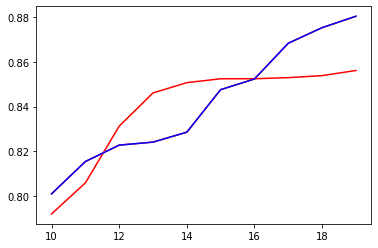

In [ ]:

random_plot(df)

#### Recalculating

In [ ]:
all = []
for i in range(1,51):
  sa=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i, header=None)
  sa = sa.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]
  all.append(CronbachAlpha(sa.T))

In [ ]:
sum(all) / len(all)

0.8141793027340136

In [ ]:
core = []
for i in range(1,51):
  sa=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i, header=None)
  sa = sa.iloc[:,[0,1,5,6,7,10,11,12,13,14,15,16,17,18,19]]
  core.append(CronbachAlpha(sa.T))

In [ ]:
sum(core) / len(core)

0.7861599974870527

In [ ]:
all = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

In [ ]:
x = []
y = []
for j in range(50):
  lst = random.sample(all, 15)
  core_1 = []
  for i in range(1,51):
    sa=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i, header=None)
    sa = sa.iloc[:,lst]
    core_1.append(CronbachAlpha(sa.T))
  x.append(lst)
  y.append(sum(core_1) / len(core_1))
  print(lst, ":",sum(core_1) / len(core_1))

In [ ]:
# ouput for the previous cell. all the cronbach alphas. corresponding lists in x
y=[0.7798637687778961,0.7496131652879793,0.7767834529256341,0.7520030096591221,0.7535960576273673,0.7766756181827138,0.7617535856279793,0.7818704356115651,0.7639302996126104,0.7787127316045512,0.7607978714728216,0.7558545668576874,0.7509144813827804,0.7610745513195886,0.7644177479533536,0.7553526881471236,0.7766669202147211,0.7519182858475757,0.7625302365656096,0.7657934640408912,0.7533855634715012,0.7651411488346426,0.773025789125517,0.7487771668491122,0.7517679302300251,0.7735989895604835,0.7534655838592428,0.745651286469064,0.7441286674023501,0.7702858391784404,0.7648479416443101,0.7631170856530344,0.7852718346312909,0.7722104813620361,0.7575901528164464,0.7668620984663125,0.7595593961088152,0.750207649387236,0.7773016909583399,0.753573738723023,0.7699876343020441,0.7595170301549001,0.7712174783243282,0.7505231577980274,0.7765590531989278,0.7708463242921545,0.7510575648123168,0.7719153845484421,0.7682313329050814]

In [ ]:
# randomly selected list to calculate cronbach alpha. corresponding values in list y
random_lists = [[1, 4, 10, 18, 5, 19, 8, 17, 14, 15, 16, 6, 2, 9, 0],[12, 19, 2, 6, 17, 16, 10, 14, 8, 5, 1, 4, 7, 9, 13],[7, 9, 2, 0, 11, 15, 19, 5, 4, 17, 3, 18, 1, 16, 10] ,
[2, 13, 11, 1, 18, 16, 6, 17, 9, 4, 7, 12, 14, 10, 3] ,[3, 4, 1, 9, 17, 8, 7, 12, 16, 10, 5, 19, 18, 11, 6] ,
[9, 0, 11, 12, 15, 14, 18, 17, 10, 4, 8, 6, 16, 19, 7],[11, 9, 18, 14, 12, 1, 19, 0, 6, 7, 15, 3, 17, 2, 8] ,
[9, 11, 1, 12, 2, 0, 19, 16, 10, 4, 15, 18, 6, 17, 5] ,
[19, 17, 9, 13, 3, 14, 0, 18, 6, 15, 2, 7, 5, 11, 10] ,
[13, 15, 7, 0, 14, 16, 5, 2, 9, 12, 17, 19, 1, 8, 18], [10, 9, 0, 12, 6, 8, 5, 18, 19, 4, 1, 7, 16, 2, 3] ,[1, 3, 14, 4, 15, 8, 2, 12, 18, 13, 6, 5, 17, 9, 16],
[9, 0, 13, 16, 11, 4, 14, 2, 7, 5, 8, 19, 12, 10, 6],[12, 2, 13, 15, 17, 6, 9, 8, 19, 10, 18, 3, 0, 4, 11],[16, 17, 3, 4, 6, 12, 1, 8, 0, 19, 10, 14, 9, 7, 15] ,
[10, 14, 13, 3, 2, 1, 11, 0, 16, 6, 12, 9, 19, 7, 4] ,[6, 2, 18, 14, 10, 16, 19, 8, 3, 7, 17, 11, 1, 0, 13],[9, 16, 19, 10, 6, 18, 1, 14, 4, 5, 7, 3, 15, 8, 2] ,
[16, 4, 10, 5, 17, 3, 11, 0, 13, 1, 19, 12, 14, 2, 8],[5, 9, 6, 10, 14, 16, 15, 11, 4, 3, 12, 13, 1, 18, 0],
[18, 7, 5, 19, 1, 0, 3, 2, 9, 17, 11, 6, 8, 14, 4] ,[18, 6, 7, 0, 16, 19, 4, 14, 8, 15, 1, 12, 5, 9, 3],
[19, 3, 5, 11, 8, 13, 1, 4, 7, 16, 0, 2, 14, 15, 18],[19, 5, 2, 3, 10, 14, 12, 1, 8, 17, 7, 6, 4, 0, 13] ,[7, 5, 8, 3, 6, 15, 9, 10, 4, 12, 19, 11, 18, 0, 13],
[19, 16, 2, 7, 11, 15, 13, 5, 10, 0, 14, 18, 8, 1, 9],[1, 10, 16, 7, 15, 3, 6, 14, 18, 5, 11, 19, 8, 9, 12],
[14, 3, 10, 16, 7, 2, 15, 5, 4, 12, 0, 8, 9, 6, 1] ,
[11, 2, 1, 10, 17, 6, 3, 14, 8, 19, 5, 12, 9, 18, 7],
[2, 11, 7, 17, 15, 16, 10, 1, 8, 6, 12, 4, 18, 3, 0],
[2, 1, 4, 0, 6, 16, 17, 14, 9, 8, 18, 5, 7, 3, 15] ,
[19, 18, 1, 3, 8, 4, 14, 13, 10, 2, 0, 17, 6, 7, 5],
[19, 15, 16, 1, 4, 10, 18, 13, 17, 8, 7, 14, 12, 0, 6] ,
[6, 13, 16, 17, 4, 9, 12, 3, 1, 7, 14, 18, 19, 11, 0] ,
[9, 18, 1, 5, 19, 14, 11, 4, 17, 8, 16, 12, 10, 3, 7], 
[5, 0, 15, 4, 2, 18, 1, 19, 7, 14, 8, 12, 3, 9, 16] ,
[17, 0, 8, 14, 3, 13, 16, 10, 1, 4, 15, 6, 11, 5, 9],
[5, 0, 14, 7, 19, 6, 4, 18, 2, 8, 17, 9, 12, 3, 11] ,
[7, 13, 12, 11, 15, 2, 18, 14, 8, 16, 19, 1, 6, 0, 10],[13, 0, 6, 15, 12, 2, 3, 18, 17, 11, 1, 9, 8, 4, 7] ,[4, 9, 15, 3, 1, 16, 6, 14, 18, 10, 17, 5, 7, 2, 0] ,[8, 16, 14, 4, 13, 15, 11, 17, 10, 0, 5, 7, 12, 9, 6] ,
[18, 12, 5, 13, 8, 16, 3, 15, 4, 1, 19, 11, 10, 7, 0] ,
[16, 4, 8, 11, 9, 0, 6, 13, 5, 15, 3, 2, 12, 17, 7],[18, 3, 5, 17, 19, 6, 11, 7, 0, 16, 12, 1, 8, 10, 15],[5, 10, 15, 8, 13, 1, 16, 17, 0, 7, 12, 3, 18, 9, 14], [3, 7, 6, 8, 17, 10, 9, 13, 4, 15, 1, 12, 19, 16, 2],
[14, 4, 16, 8, 9, 6, 2, 19, 18, 0, 3, 13, 17, 11, 10] ,
[8, 18, 12, 19, 10, 3, 5, 11, 13, 4, 7, 16, 0, 17, 6], 
[13, 16, 2, 9, 15, 19, 8, 18, 5, 17, 0, 6, 4, 7, 1]]

In [ ]:
print("max",max(y))
print("avg",sum(y) / len(y))

max 0.7852718346312909
avg 0.7632601619140208


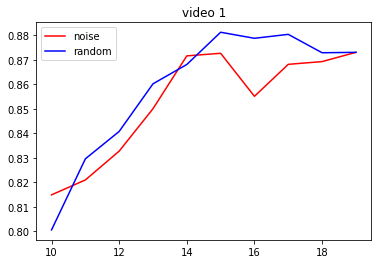

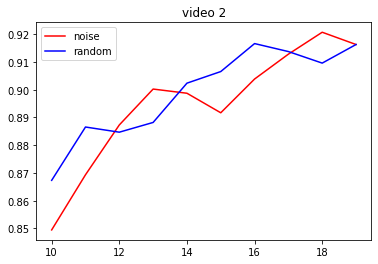

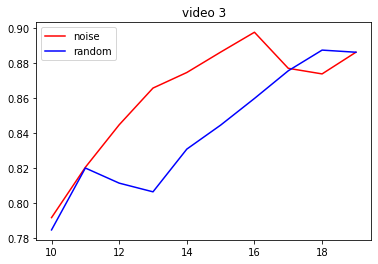

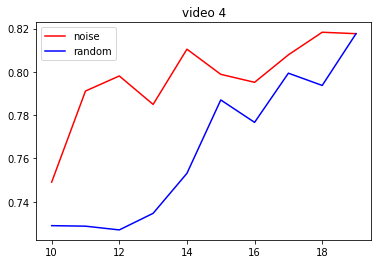

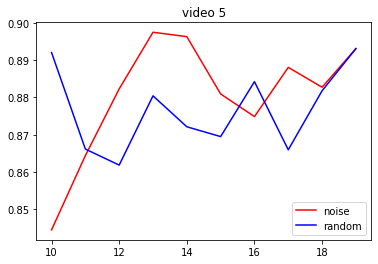

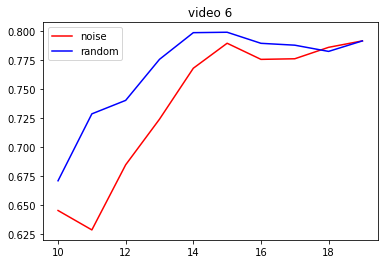

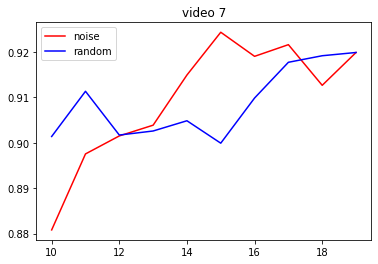

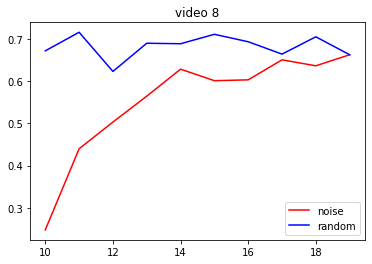

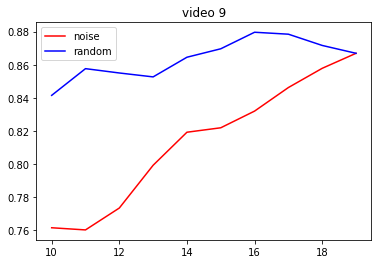

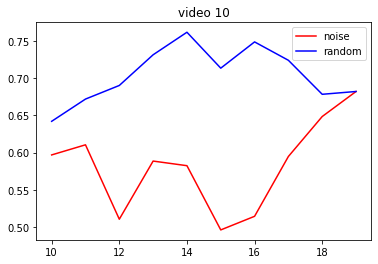

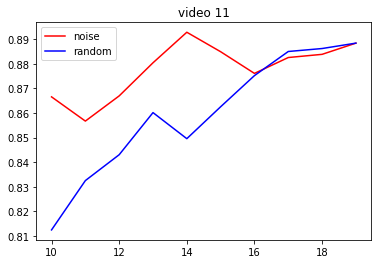

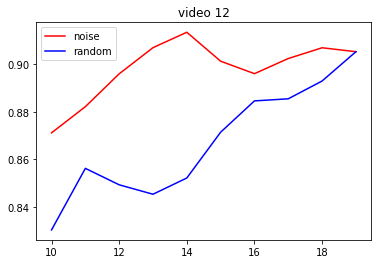

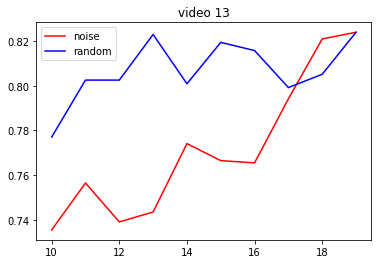

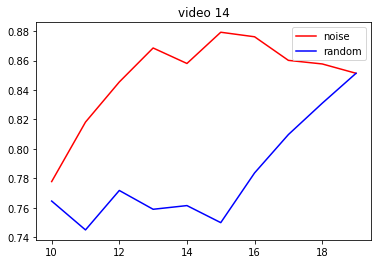

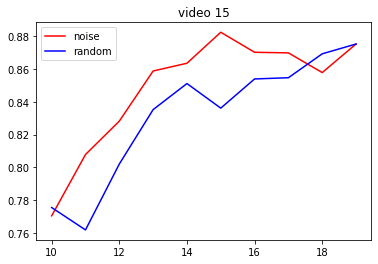

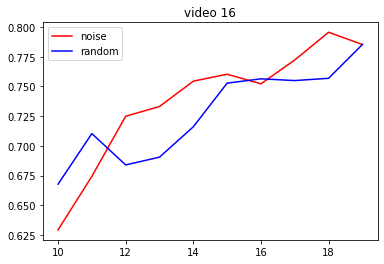

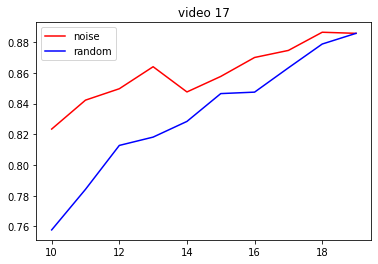

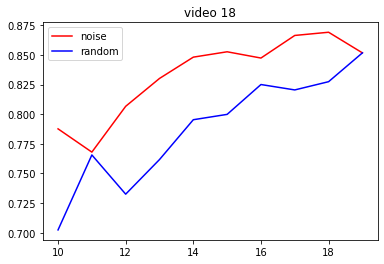

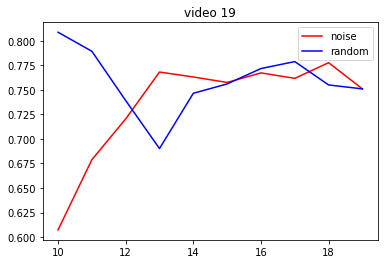

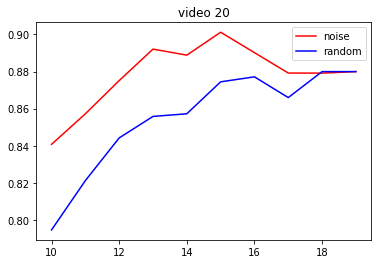

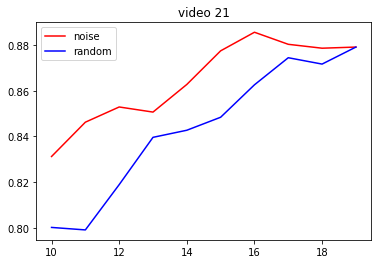

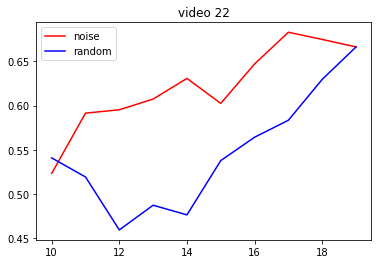

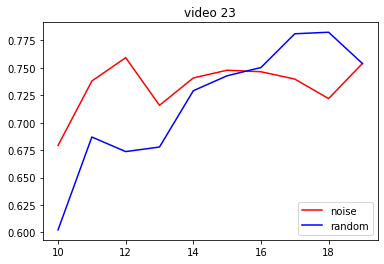

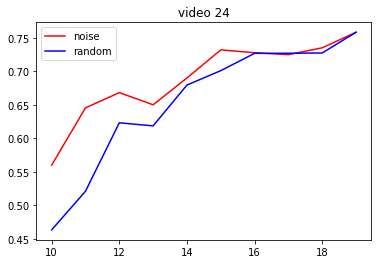

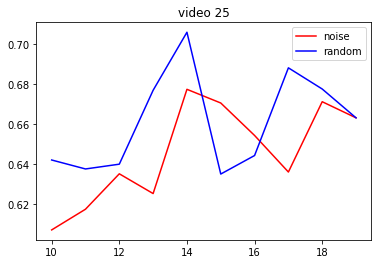

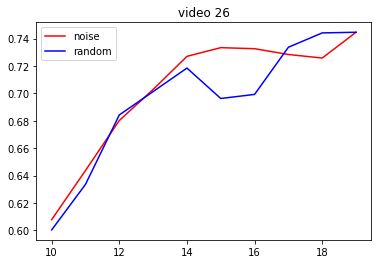

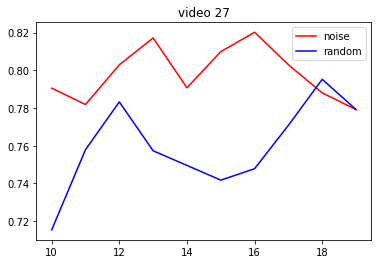

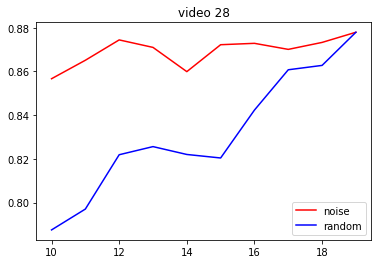

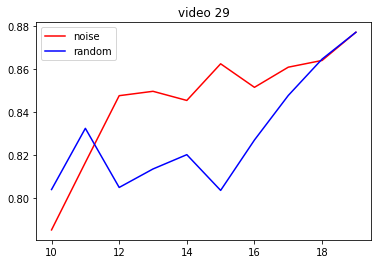

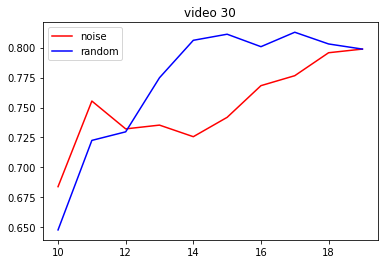

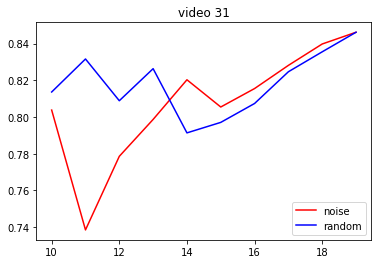

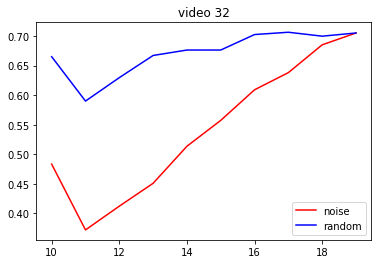

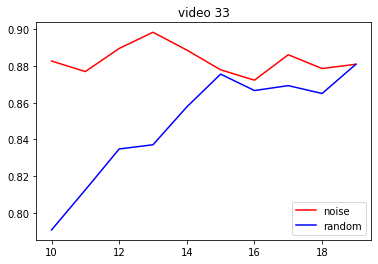

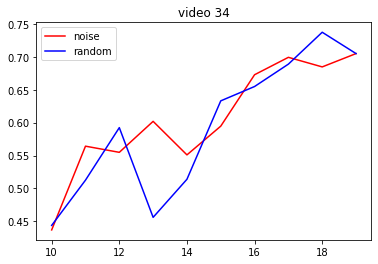

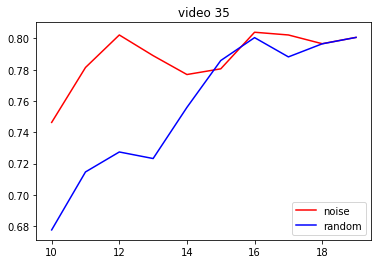

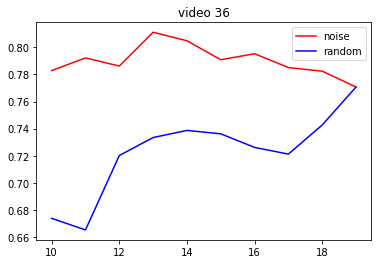

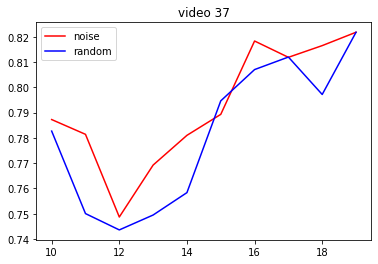

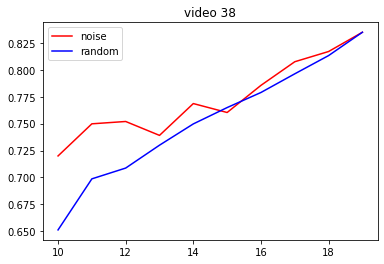

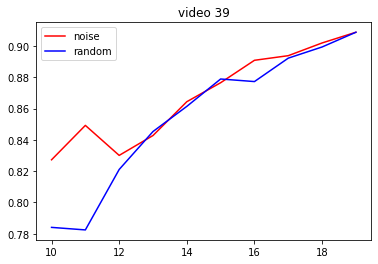

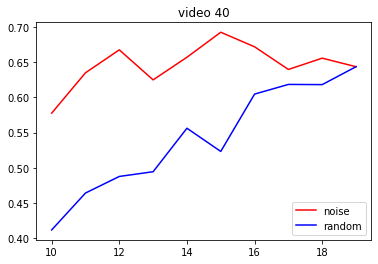

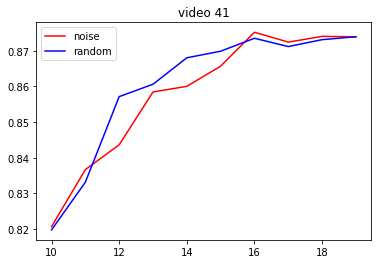

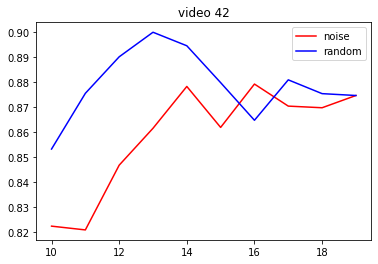

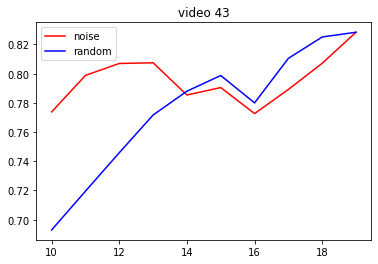

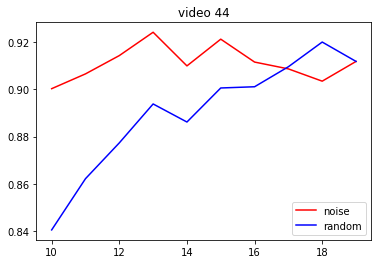

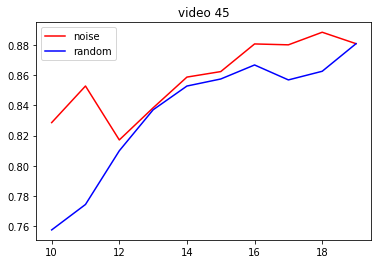

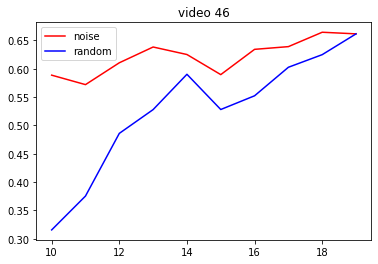

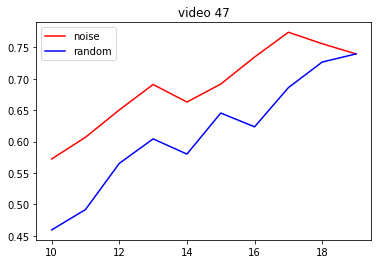

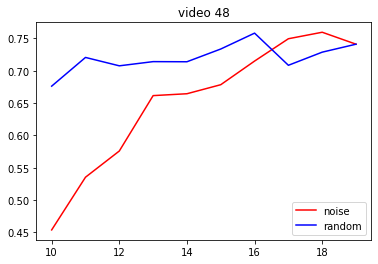

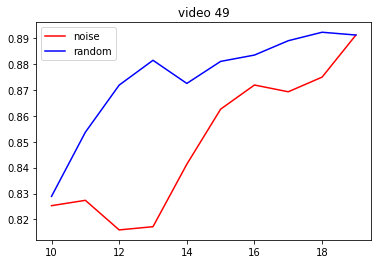

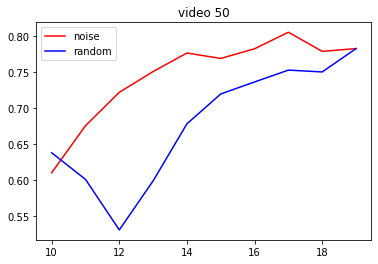

In [ ]:
 for i in range(1,51):
  sa=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i, header=None)
  all = sa.iloc[:,0:20]
  lst_1,lst = random_plot(all)
  plt.plot([l for l in range(10,20)],lst_1,color = 'red',label='noise')
  plt.plot([l for l in range(10,20)],lst,color = 'blue',label='random')
  plt.legend()
  plt.title("video "+str(i)) 
  plt.show()

### Variance

In [ ]:
var = []
for i in range(1,51):
    sa=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i, header=None)
    sa = sa.iloc[:,0:20]
    temp = sa.var(axis=1).mean()
    var.append(temp)
print(var)

[0.9548750142791158, 0.8893630995149993, 0.9103543686951168, 1.0919132783414847, 0.9059813645927262, 1.0317326897017125, 0.8201503086274325, 1.1074966671999147, 0.9683091823710488, 1.2158606152427376, 0.9813667413213886, 0.8315064917864198, 1.1166790844608692, 1.0362955090177535, 1.001939602707045, 1.101975202322988, 0.9561688603993735, 0.953694378789436, 1.1690888008946085, 0.9721236475261218, 0.8958414923219623, 1.2028147342388829, 1.1387848283468394, 1.1161120777149485, 1.0959638457846745, 1.1713744279176201, 1.0866379331125284, 0.9282237716014466, 1.0013043034356017, 1.0956600302253763, 0.9526344964406581, 1.2389483374401282, 0.9025896390808673, 1.5359663328361388, 1.1193998608441336, 1.0840554552608435, 1.0088301322025444, 1.0851106855885038, 0.8957604094269286, 1.2156972508369224, 0.9057651561084056, 0.9893092936078198, 1.0570488531204303, 0.8786441009587165, 0.9753389473684212, 1.2168937156374964, 1.3198911836553409, 1.1978669080298283, 0.8697471991820113, 1.0580222800925927]


In [ ]:
sum(var)/len(var)

1.0451422518042182

In [ ]:
var = []
for i in x:
  sa = df.iloc[:,i]
  temp = sa.var(axis=1).mean()
  var.append(temp)

In [ ]:
sum(var)/len(var)

1.0291751997084095

In [ ]:
min(var)

1.0025616086032771

In [ ]:
len(i)

15

In [ ]:
sa = df.iloc[:,[0,1,5,6,7,10,11,12,13,14,15,16,17,18,19]]
temp = sa.var(axis=1).mean()

In [ ]:
temp

0.9984660945402022

### Average inter-item correlation

In [ ]:
core = [0,1,5,6,7,10,11,12,13,14,15,16,17,18,19]

In [ ]:
z = [[x, y] for x in core for y in core if y > x]

In [ ]:
corr = []
for i in z:
  corr.append(df[i[0]].corr(df[i[1]]))
print(corr)
sum(corr)/len(corr)

[0.2540372173588816, 0.1854769064778212, 0.23672431188801968, 0.2412211479022198, 0.24026923278314175, 0.17902236798446441, 0.2426226400930877, 0.2458803155302244, 0.22816471316733683, 0.2600855095293154, 0.338029593526498, 0.31230720899769693, 0.34839760457852104, 0.2814715790949773, 0.18935838711194744, 0.12398690828117948, 0.1755958959282063, 0.14038966311459594, 0.1606510788715888, 0.17269423435925838, 0.19117616428694423, 0.17510330194145116, 0.1617469899328088, 0.19622368115486835, 0.1668117530253707, 0.21204440118498669, 0.22931051774694894, 0.1879527109855568, 0.1730330779620589, 0.18471151766112084, 0.203548666339548, 0.20273283534088674, 0.2612126748695127, 0.18101163605525286, 0.18059299059355535, 0.24377195039758084, 0.22814118207904482, 0.21566955851326977, 0.1790363285673412, 0.18564588986010278, 0.22041943081224522, 0.15483942186376462, 0.22226739082131228, 0.16965945165697394, 0.16619426605551688, 0.23210041094041658, 0.2485336352136007, 0.2021934856750385, 0.2360749276

0.2320629344094383

In [ ]:
avg_inter_correlation = []
for j in random_lists:
  z = [[x, y] for x in j for y in j if y > x]
  corr = []
  for i in z:
    corr.append(df[i[0]].corr(df[i[1]]))
  avg_inter_correlation.append(sum(corr)/len(corr))

In [ ]:
max(avg_inter_correlation)

0.22164679790815475

In [ ]:
sum(avg_inter_correlation)/len(avg_inter_correlation)

0.20342775752730397

### test

In [ ]:
x = []
y = []
for j in range(50):
  lst = random.sample(all, 17)
  core_1 = []
  for i in range(1,51):
    sa=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i, header=None)
    sa = sa.iloc[:,lst]
    core_1.append(CronbachAlpha(sa.T))
  x.append(lst)
  y.append(sum(core_1) / len(core_1))
  print(lst, ":",sum(core_1) / len(core_1))

[19, 3, 0, 14, 7, 1, 9, 18, 6, 12, 11, 10, 17, 4, 13, 2, 5] : 0.7808136806752438
[2, 0, 8, 16, 3, 6, 4, 18, 7, 5, 1, 19, 12, 15, 10, 9, 13] : 0.7866546713938583
[5, 12, 3, 6, 19, 7, 9, 18, 16, 13, 17, 15, 4, 10, 8, 11, 0] : 0.789706588985877
[12, 7, 8, 16, 19, 6, 9, 18, 15, 17, 0, 3, 1, 5, 4, 2, 10] : 0.7910291641221237
[4, 2, 7, 17, 18, 12, 14, 6, 15, 10, 0, 3, 13, 19, 8, 1, 9] : 0.7842468704296148
[15, 13, 2, 6, 4, 5, 7, 8, 9, 19, 11, 12, 18, 14, 10, 3, 16] : 0.77396724961976
[18, 10, 5, 11, 7, 2, 4, 3, 8, 6, 15, 12, 17, 19, 1, 16, 0] : 0.7929214834463724
[17, 18, 16, 19, 13, 8, 12, 0, 1, 9, 11, 15, 5, 2, 3, 6, 10] : 0.7930887330063754
[9, 4, 18, 16, 19, 0, 14, 11, 6, 3, 10, 7, 12, 17, 13, 8, 1] : 0.7892210313401808
[17, 7, 0, 16, 12, 18, 19, 8, 9, 4, 11, 2, 1, 15, 10, 14, 6] : 0.7950026251415347
[2, 3, 19, 14, 18, 17, 9, 7, 16, 11, 15, 10, 8, 6, 4, 0, 5] : 0.7878099348689068
[16, 9, 8, 0, 4, 11, 19, 1, 17, 13, 7, 2, 18, 14, 3, 6, 10] : 0.789539301616866
[4, 2, 8, 9, 13, 18, 16, 14, 

In [ ]:
max(y)

0.8008022250434094

In [ ]:
sum(y)/len(y)

0.7867310419210968

In [ ]:
core_1 = []
for i in range(1,51):
  sa=pd.read_excel(open('tvsum50.xlsx', 'rb'),sheet_name=i, header=None)
  sa = sa.iloc[:,[0,1,3,4,5,6,7,10,11,12,13,14,15,16,17,18,19]]
  core_1.append(CronbachAlpha(sa.T))
print(sum(core_1) / len(core_1))

0.7976264302038372


In [ ]:
m = [6, 5, 13, 12, 4, 15, 10, 1, 8, 17, 16, 14, 0, 2, 11, 19, 18]
m.sort()

In [ ]:
m

[0, 1, 2, 4, 5, 6, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]